# Insurance Claims Data analysis and Predictive Model

**Business Objective:**

AlphaCare Insurance Solutions (ACIS) aims to leverage advanced risk and predictive analytics to improve car insurance planning and marketing in South Africa. As a marketing analytics engineer, your role is to analyze historical insurance claim data to optimize marketing strategies and identify low-risk targets for premium reductions, thereby attracting new clients.

### import libraries

In [38]:
import sys
sys.path.append('../src')
from data_loader import DataLoader
from data_quality_check import missing_values_summary
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

### Load the data

In [39]:
# Load the data
file_path = '../data/MachineLearningRating_v3.txt'
data_loader = DataLoader(file_path)
df = data_loader.load_data()

In [40]:

data_loader.display_head()

UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
0               145249     12827  2015-03-01 00:00:00             True   
1               145249     12827  2015-05-01 00:00:00             True   
2               145249     12827  2015-07-01 00:00:00             True   
3               145255     12827  2015-05-01 00:00:00             True   
4               145255     12827  2015-07-01 00:00:00             True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr  English  First National Bank   

       AccountType  ...                    ExcessSelected CoverCategory  \
0  Current account  ...             Mobility - Windscreen    Windscreen   
1  Current account  ...             Mobility - Windscreen    Windscreen   
2  Current account  ...             Mobility - Windscreen    Windscreen   
3  Current account  ...  Mobility - Metered Taxis - R2000    Own damage   
4  Current account  ...  Mobility - Metered Taxis - R2000    Own damage   

    CoverType            CoverGroup              Section  \
0  Windscreen  Comprehensive - Taxi  Motor Comprehensive   
1  Windscreen  Comprehensive - Taxi  Motor Comprehensive   
2  Windscreen  Comprehensive - Taxi  Motor Comprehensive   
3  Own Damage  Comprehensive - Taxi  Motor Comprehensive   
4  Own Damage  Comprehensive - Taxi  Motor Comprehensive   

                           Product StatutoryClass StatutoryRiskType  \
0  Mobility Metered Taxis: Monthly     Commercial     IFRS Constant   
1  Mobility Metered Taxis: Monthly     Commercial     IFRS Constant   
2  Mobility Metered Taxis: Monthly     Commercial     IFRS Constant   
3  Mobility Metered Taxis: Monthly     Commercial     IFRS Constant   
4  Mobility Metered Taxis: Monthly     Commercial     IFRS Constant   

   TotalPremium TotalClaims  
0     21.929825         0.0  
1     21.929825         0.0  
2      0.000000         0.0  
3    512.848070         0.0  
4      0.000000         0.0  

[5 rows x 52 columns]

#### Display basic info

In [41]:
# Display basic info
data_loader.basic_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

#### Convert columns to appropriate data types

In [42]:
# Convert columns to appropriate data types
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])
df['PostalCode'] = df['PostalCode'].astype(str)
df['mmcode'] = df['mmcode'].astype('Int64')  # Use 'Int64' for nullable integers
df['Cylinders'] = df['Cylinders'].astype('Int64')
df['NumberOfDoors'] = df['NumberOfDoors'].astype('Int64')
df['VehicleIntroDate'] = pd.to_datetime(df['VehicleIntroDate'], errors='coerce')
df['CapitalOutstanding'] = pd.to_numeric(df['CapitalOutstanding'], errors='coerce')
df['NewVehicle'] = df['NewVehicle'].astype('bool')
df['WrittenOff'] = df['WrittenOff'].astype('bool')
df['Rebuilt'] = df['Rebuilt'].astype('bool')
df['Converted'] = df['Converted'].astype('bool')
df['CrossBorder'] = df['CrossBorder'].astype('bool')

# Convert categorical columns to 'category' data type
categorical_columns = [
    'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType',
    'MaritalStatus', 'Gender', 'Country', 'Province', 'MainCrestaZone',
    'SubCrestaZone', 'ItemType', 'VehicleType', 'make', 'Model', 'bodytype',
    'AlarmImmobiliser', 'TrackingDevice', 'TermFrequency', 'ExcessSelected',
    'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product',
    'StatutoryClass', 'StatutoryRiskType'
]

for col in categorical_columns:
    df[col] = df[col].astype('category')
# Check the data types to confirm changes
print(df.dtypes)

C:\Users\zelalem.wubet\AppData\Local\Temp\ipykernel_29008\3677959769.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['VehicleIntroDate'] = pd.to_datetime(df['VehicleIntroDate'], errors='coerce')


UnderwrittenCoverID                  int64
PolicyID                             int64
TransactionMonth            datetime64[ns]
IsVATRegistered                       bool
Citizenship                       category
LegalType                         category
Title                             category
Language                          category
Bank                              category
AccountType                       category
MaritalStatus                     category
Gender                            category
Country                           category
Province                          category
PostalCode                          object
MainCrestaZone                    category
SubCrestaZone                     category
ItemType                          category
mmcode                               Int64
VehicleType                       category
RegistrationYear                     int64
make                              category
Model                             category
Cylinders  

### Checking Missing Value

In [43]:
missing_values_summary(df)

Missing Values  Percentage
NumberOfVehiclesInFleet          1000098  100.000000
CustomValueEstimate               779642   77.956560
Bank                              145961   14.594670
AccountType                        40232    4.022806
Gender                              9536    0.953507
MaritalStatus                       8259    0.825819
VehicleType                          552    0.055195
mmcode                               552    0.055195
make                                 552    0.055195
Cylinders                            552    0.055195
kilowatts                            552    0.055195
bodytype                             552    0.055195
Model                                552    0.055195
NumberOfDoors                        552    0.055195
cubiccapacity                        552    0.055195
VehicleIntroDate                     552    0.055195
CapitalOutstanding                   322    0.032197
IsVATRegistered                        0    0.000000
PolicyID                               0    0.000000
UnderwrittenCoverID                    0    0.000000
SubCrestaZone                          0    0.000000
ItemType                               0    0.000000
PostalCode                             0    0.000000
MainCrestaZone                         0    0.000000
Province                               0    0.000000
Country                                0    0.000000
LegalType                              0    0.000000
Citizenship                            0    0.000000
Title                                  0    0.000000
Language                               0    0.000000
TransactionMonth                       0    0.000000
RegistrationYear                       0    0.000000
TrackingDevice                         0    0.000000
NewVehicle                             0    0.000000
WrittenOff                             0    0.000000
AlarmImmobiliser                       0    0.000000
Rebuilt                                0    0.000000
Converted                              0    0.000000
CrossBorder                            0    0.000000
SumInsured                             0    0.000000
TermFrequency                          0    0.000000
CalculatedPremiumPerTerm               0    0.000000
ExcessSelected                         0    0.000000
CoverCategory                          0    0.000000
CoverType                              0    0.000000
CoverGroup                             0    0.000000
Section                                0    0.000000
Product                                0    0.000000
StatutoryClass                         0    0.000000
StatutoryRiskType                      0    0.000000
TotalPremium                           0    0.000000
TotalClaims                            0    0.000000

### Visualize Missing Value

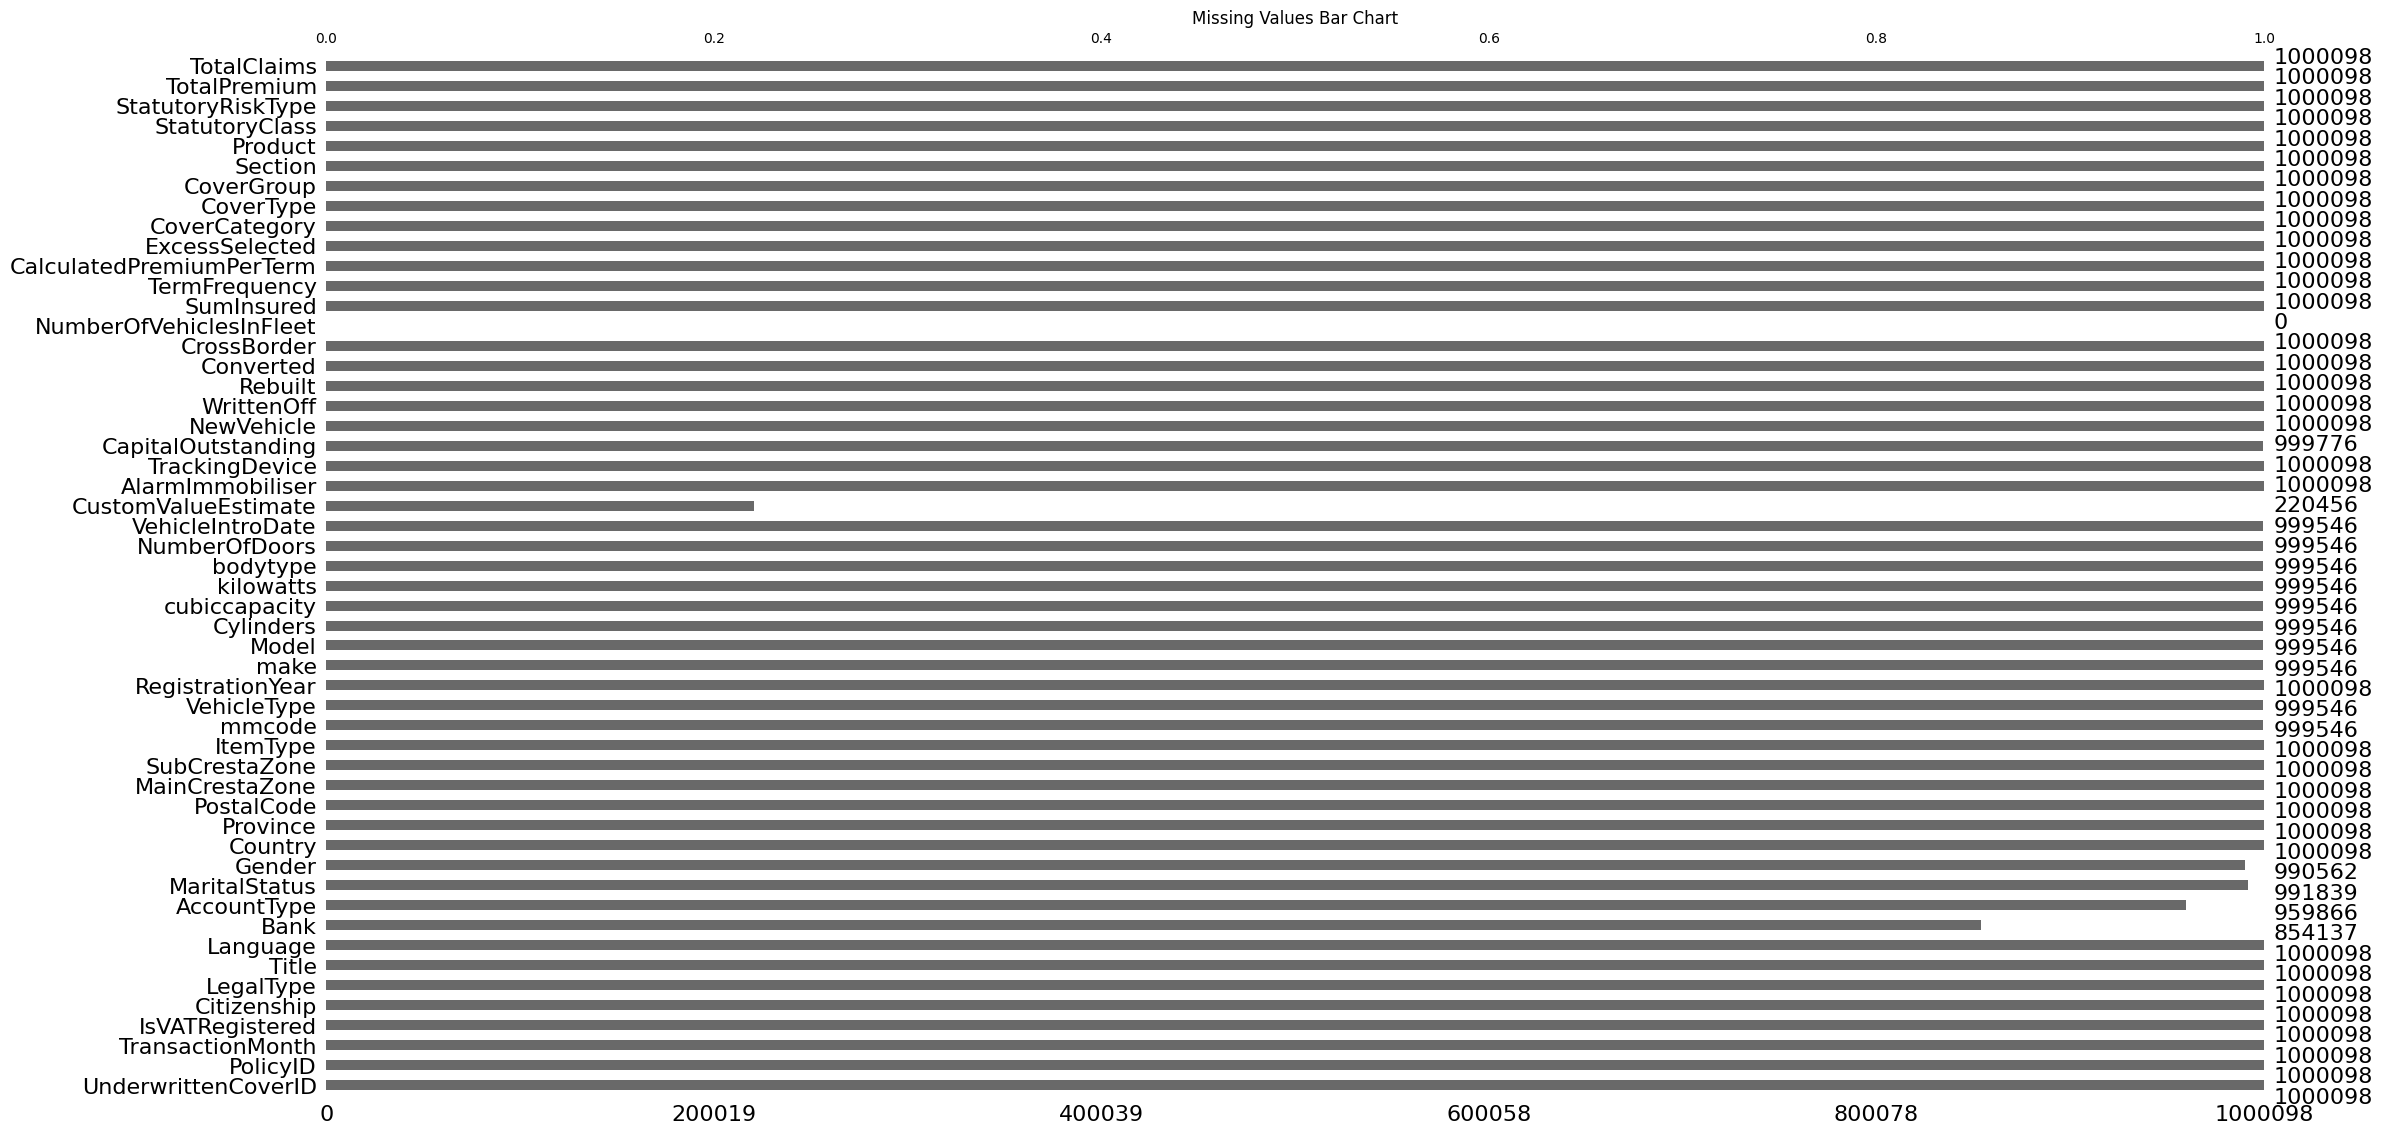

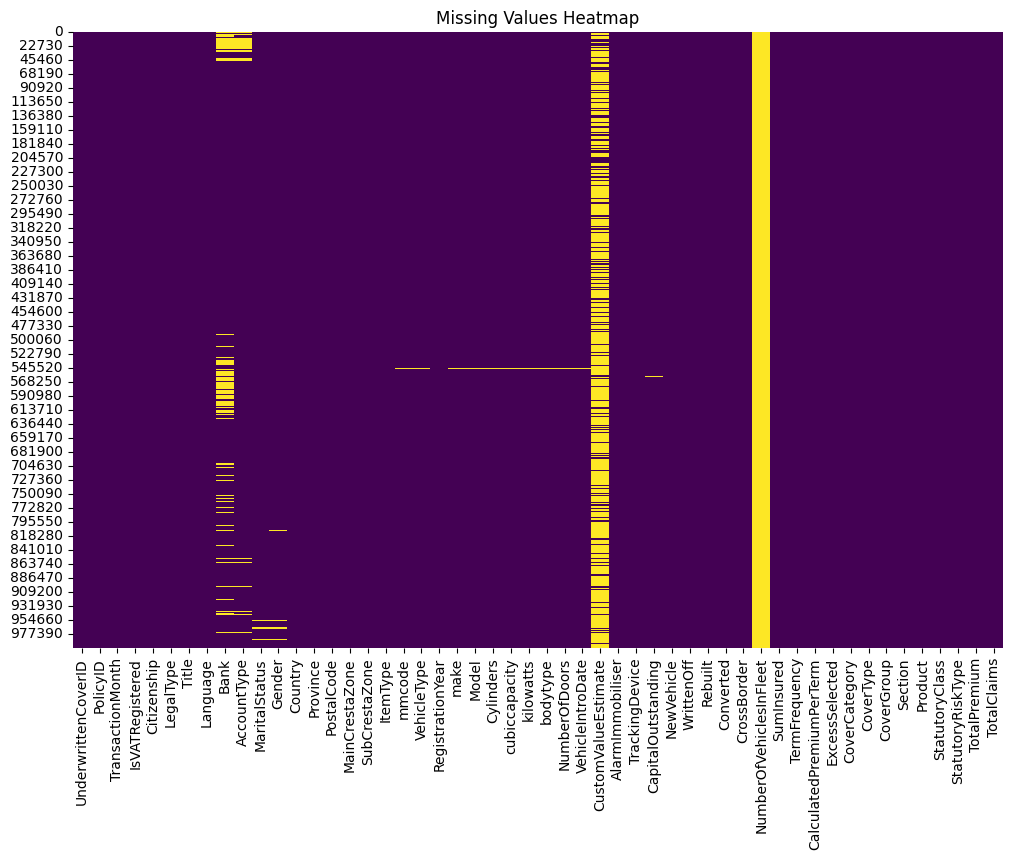

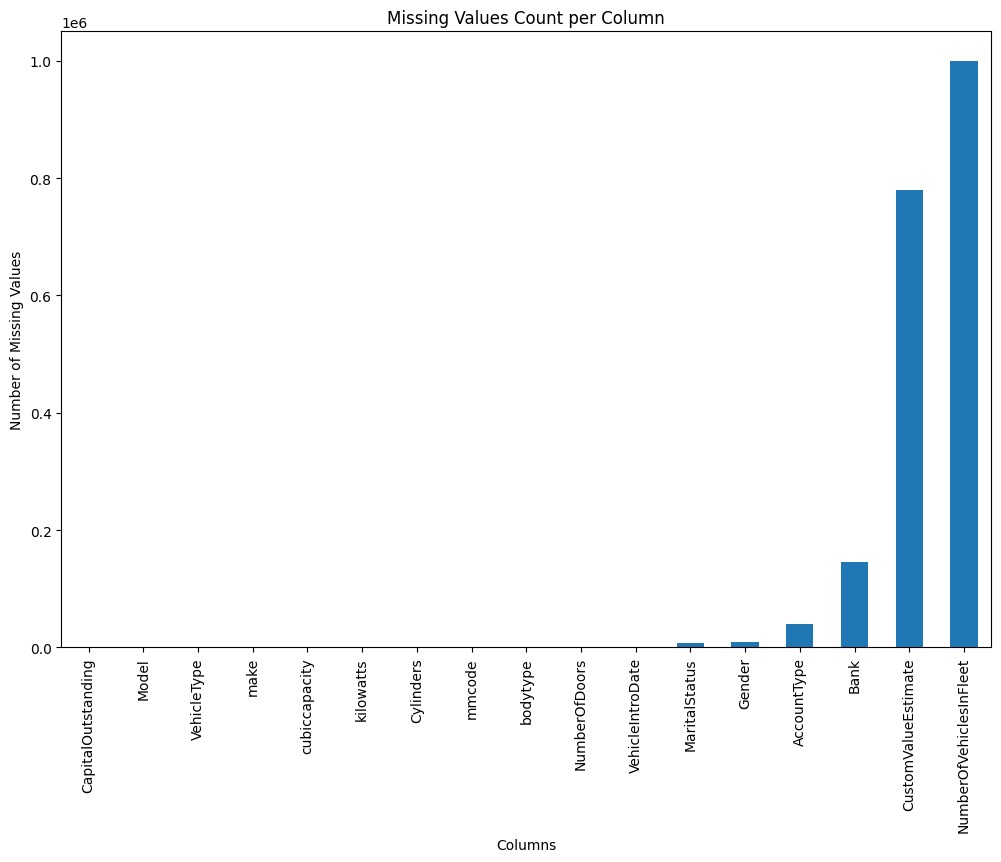

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


msno.bar(df)
plt.title('Missing Values Bar Chart')
plt.show()

# Heatmap of missing values using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Count of missing values per column
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)

# Bar plot of missing values
plt.figure(figsize=(12, 8))
missing_values.plot(kind='bar')
plt.title('Missing Values Count per Column')
plt.ylabel('Number of Missing Values')
plt.xlabel('Columns')
plt.show()


### Number of unique Values in each column

In [45]:
unique_counts = df.nunique()

print(unique_counts)

UnderwrittenCoverID         116532
PolicyID                      7000
TransactionMonth                23
IsVATRegistered                  2
Citizenship                      4
LegalType                        6
Title                            5
Language                         1
Bank                            11
AccountType                      3
MaritalStatus                    3
Gender                           3
Country                          1
Province                         9
PostalCode                     888
MainCrestaZone                  16
SubCrestaZone                   45
ItemType                         1
mmcode                         427
VehicleType                      5
RegistrationYear                25
make                            46
Model                          411
Cylinders                        7
cubiccapacity                  122
kilowatts                       82
bodytype                        13
NumberOfDoors                    6
VehicleIntroDate    

### Unique values in each column

In [46]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in UnderwrittenCoverID: [145249 145255 145247 ... 265173 265181  16093]
Unique values in PolicyID: [12827 10874 10173 ... 22498   807 22854]
Unique values in TransactionMonth: <DatetimeArray>
['2015-03-01 00:00:00', '2015-05-01 00:00:00', '2015-07-01 00:00:00',
 '2015-01-01 00:00:00', '2015-04-01 00:00:00', '2015-06-01 00:00:00',
 '2015-08-01 00:00:00', '2015-02-01 00:00:00', '2014-12-01 00:00:00',
 '2014-11-01 00:00:00', '2014-10-01 00:00:00', '2014-09-01 00:00:00',
 '2014-07-01 00:00:00', '2014-08-01 00:00:00', '2014-03-01 00:00:00',
 '2014-05-01 00:00:00', '2014-04-01 00:00:00', '2014-06-01 00:00:00',
 '2014-02-01 00:00:00', '2013-12-01 00:00:00', '2013-11-01 00:00:00',
 '2014-01-01 00:00:00', '2013-10-01 00:00:00']
Length: 23, dtype: datetime64[ns]
Unique values in IsVATRegistered: [ True False]
Unique values in Citizenship: ['  ', 'AF', 'ZA', 'ZW']
Categories (4, object): ['  ', 'AF', 'ZA', 'ZW']
Unique values in LegalType: ['Close Corporation', 'Individual', 'Partne

### Handle missing values (different strategy for different columns) 

In [47]:
# Drop columns with high missing values
df = df.drop(columns=['NumberOfVehiclesInFleet', 'CrossBorder', 'CustomValueEstimate', 'Rebuilt', 'Converted', 'WrittenOff'])

# Impute missing values
df['NewVehicle'].fillna(df['NewVehicle'].mode()[0], inplace=True)
df['Bank'].fillna(df['Bank'].mode()[0], inplace=True)
df['AccountType'].fillna(df['AccountType'].mode()[0], inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['MaritalStatus'].fillna(df['MaritalStatus'].mode()[0], inplace=True)

# Drop rows with missing values for specific columns
df.dropna(subset=['VehicleType', 'make', 'mmcode', 'Model', 'Cylinders', 'bodytype', 'kilowatts', 'NumberOfDoors', 'VehicleIntroDate', 'cubiccapacity'], inplace=True)

# impute the very few missing values in CapitalOutstanding
df['CapitalOutstanding'].fillna(df['CapitalOutstanding'].mean(), inplace=True)

print(df.isnull().sum())

C:\Users\zelalem.wubet\AppData\Local\Temp\ipykernel_29008\339028091.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['NewVehicle'].fillna(df['NewVehicle'].mode()[0], inplace=True)
C:\Users\zelalem.wubet\AppData\Local\Temp\ipykernel_29008\339028091.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

UnderwrittenCoverID         0
PolicyID                    0
TransactionMonth            0
IsVATRegistered             0
Citizenship                 0
LegalType                   0
Title                       0
Language                    0
Bank                        0
AccountType                 0
MaritalStatus               0
Gender                      0
Country                     0
Province                    0
PostalCode                  0
MainCrestaZone              0
SubCrestaZone               0
ItemType                    0
mmcode                      0
VehicleType                 0
RegistrationYear            0
make                        0
Model                       0
Cylinders                   0
cubiccapacity               0
kilowatts                   0
bodytype                    0
NumberOfDoors               0
VehicleIntroDate            0
AlarmImmobiliser            0
TrackingDevice              0
CapitalOutstanding          0
NewVehicle                  0
SumInsured

#### Save The cleaned data as csv

In [48]:
df.to_csv('../data/cleaned_data.csv', index=False)


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999546 entries, 0 to 1000097
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   UnderwrittenCoverID       999546 non-null  int64         
 1   PolicyID                  999546 non-null  int64         
 2   TransactionMonth          999546 non-null  datetime64[ns]
 3   IsVATRegistered           999546 non-null  bool          
 4   Citizenship               999546 non-null  category      
 5   LegalType                 999546 non-null  category      
 6   Title                     999546 non-null  category      
 7   Language                  999546 non-null  category      
 8   Bank                      999546 non-null  category      
 9   AccountType               999546 non-null  category      
 10  MaritalStatus             999546 non-null  category      
 11  Gender                    999546 non-null  category      
 12  Countr

###  Univariate Analysis

Plot histograms for numerical columns (TotalPremium, TotalClaims, etc.) and bar charts for categorical columns (VehicleType, Province, etc.).

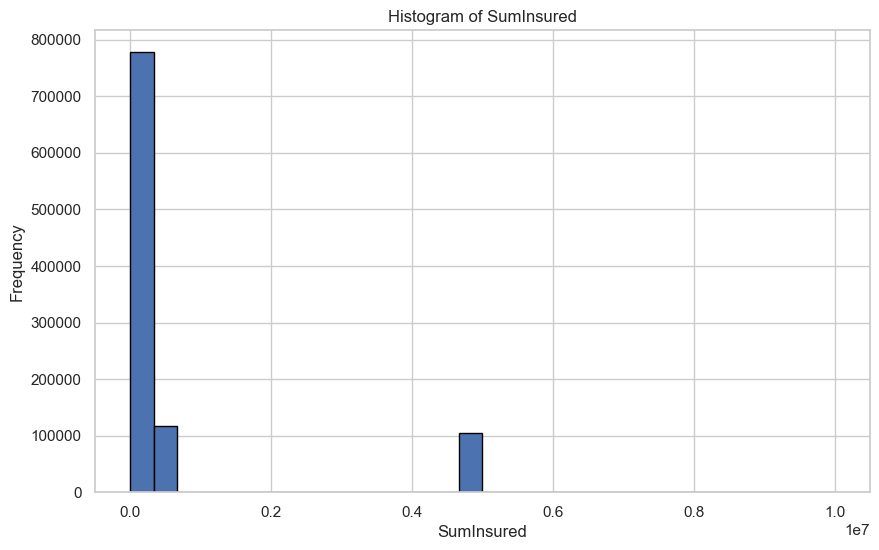

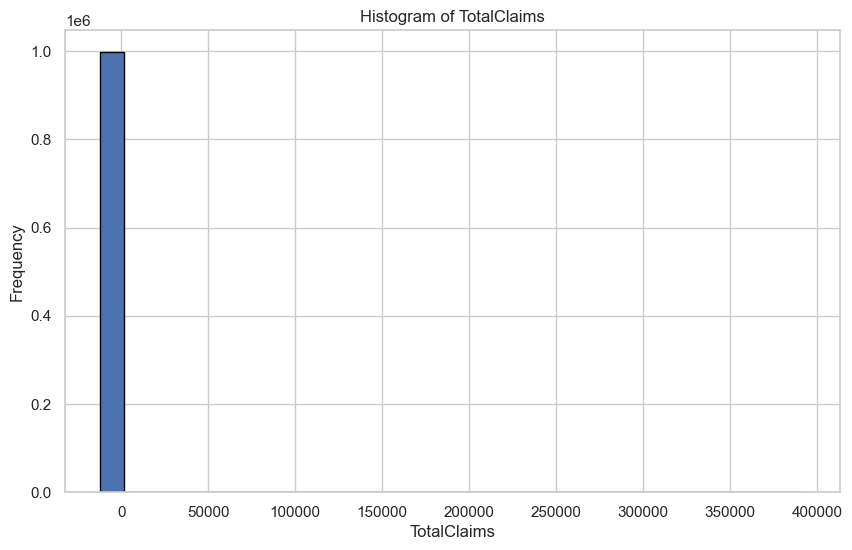

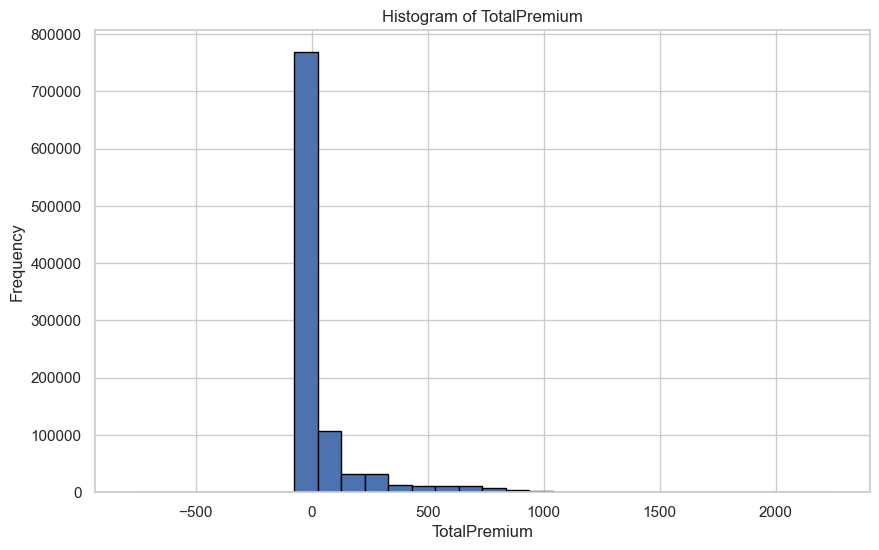

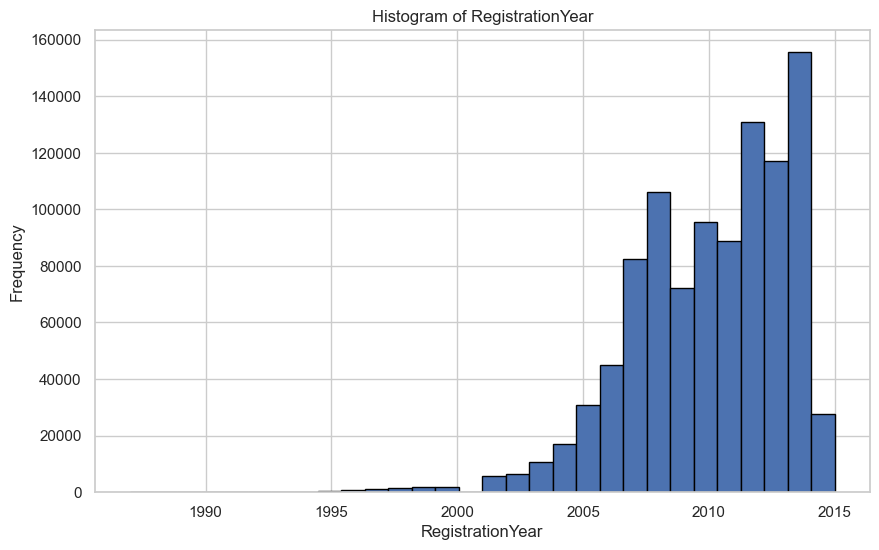

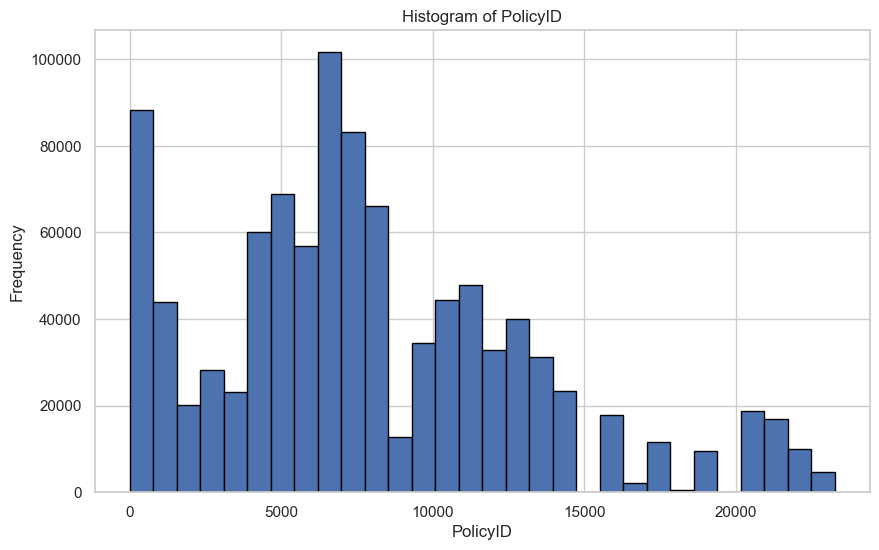

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the numerical columns you want to plot histograms for
numerical_columns_to_plot = ['SumInsured', 'TotalClaims', 'TotalPremium','RegistrationYear','PolicyID']  

# Plot histograms for specified numerical columns
for col in numerical_columns_to_plot:
    plt.figure(figsize=(10, 6))
    df[col].hist(bins=30, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

#### categorical columns

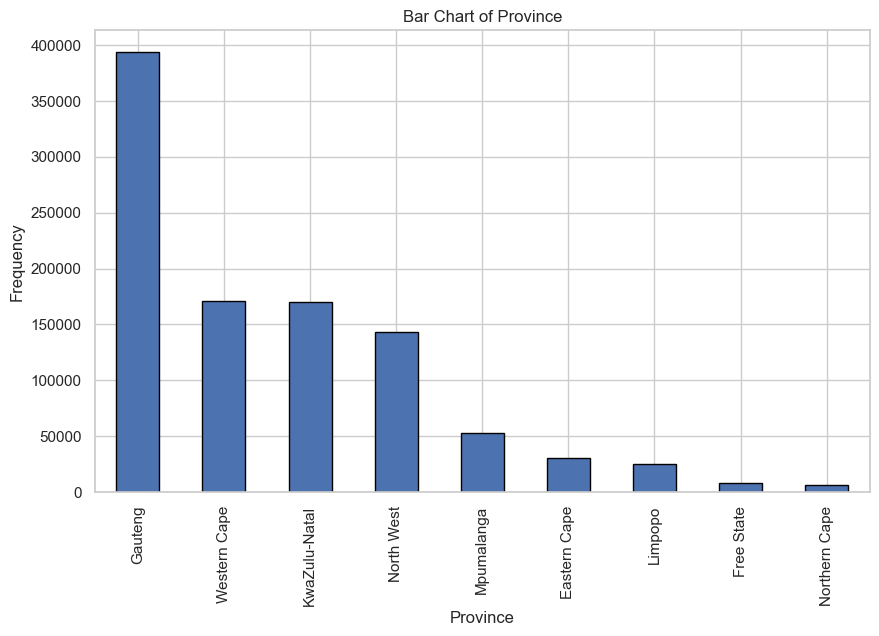

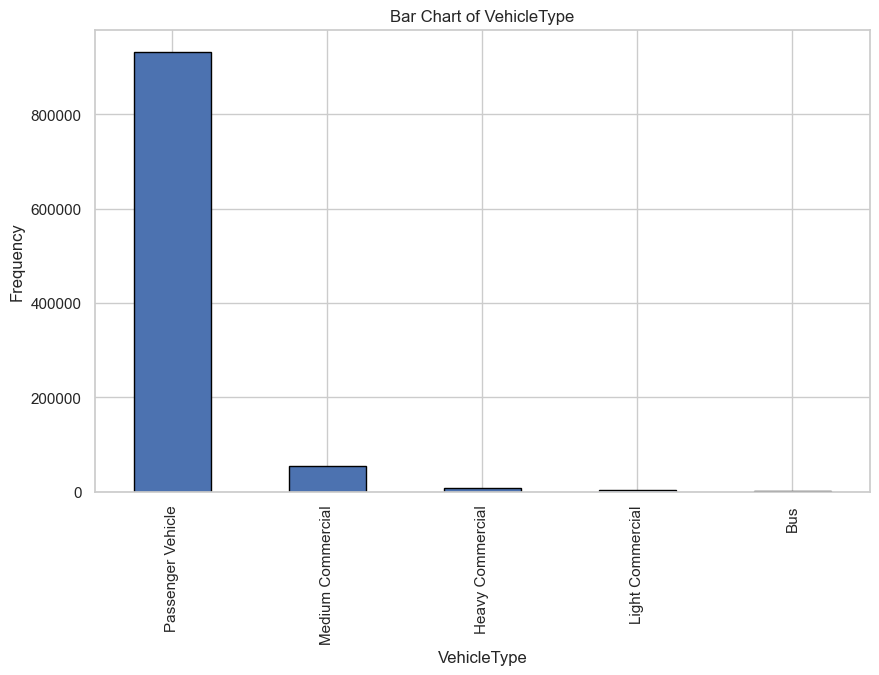

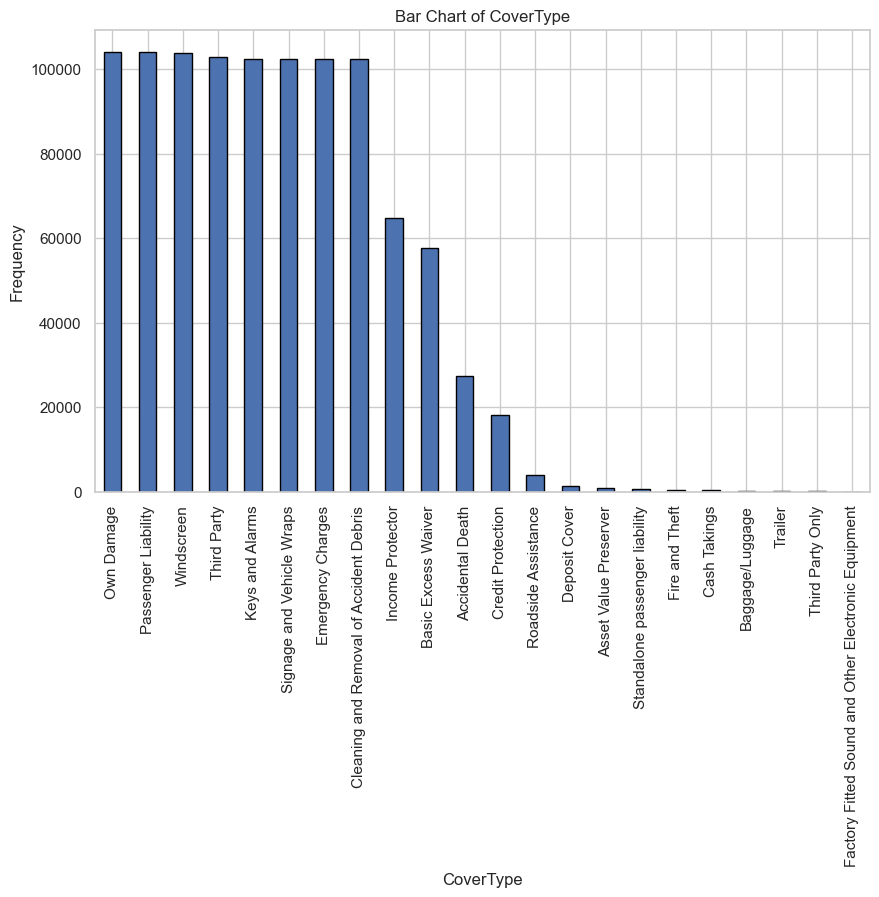

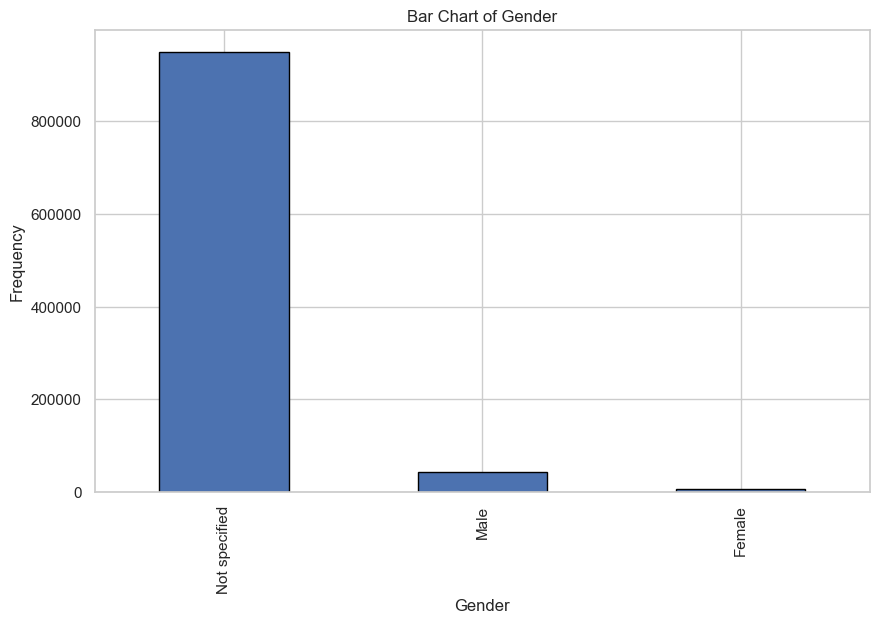

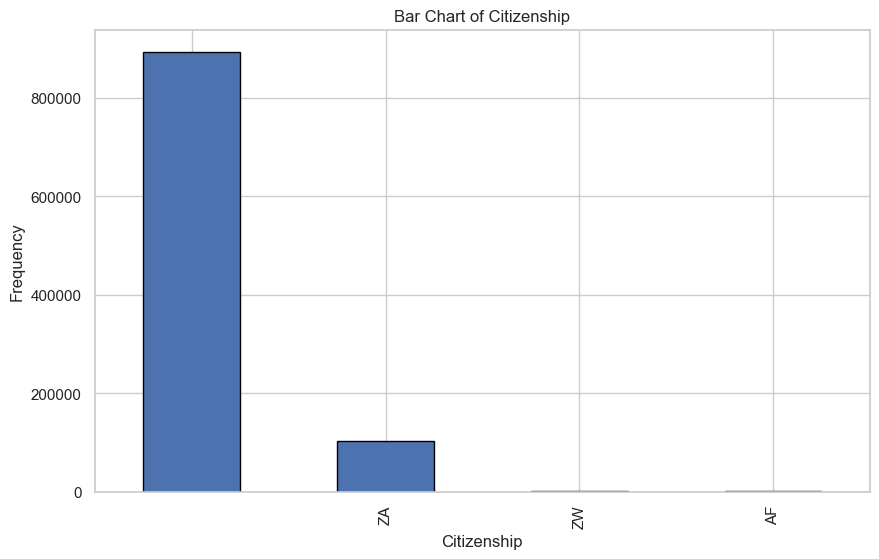

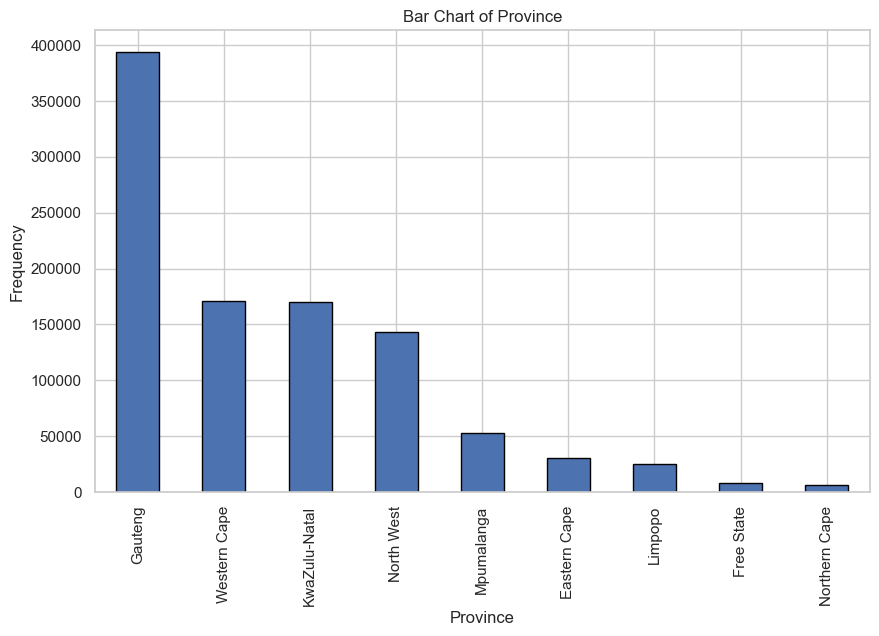

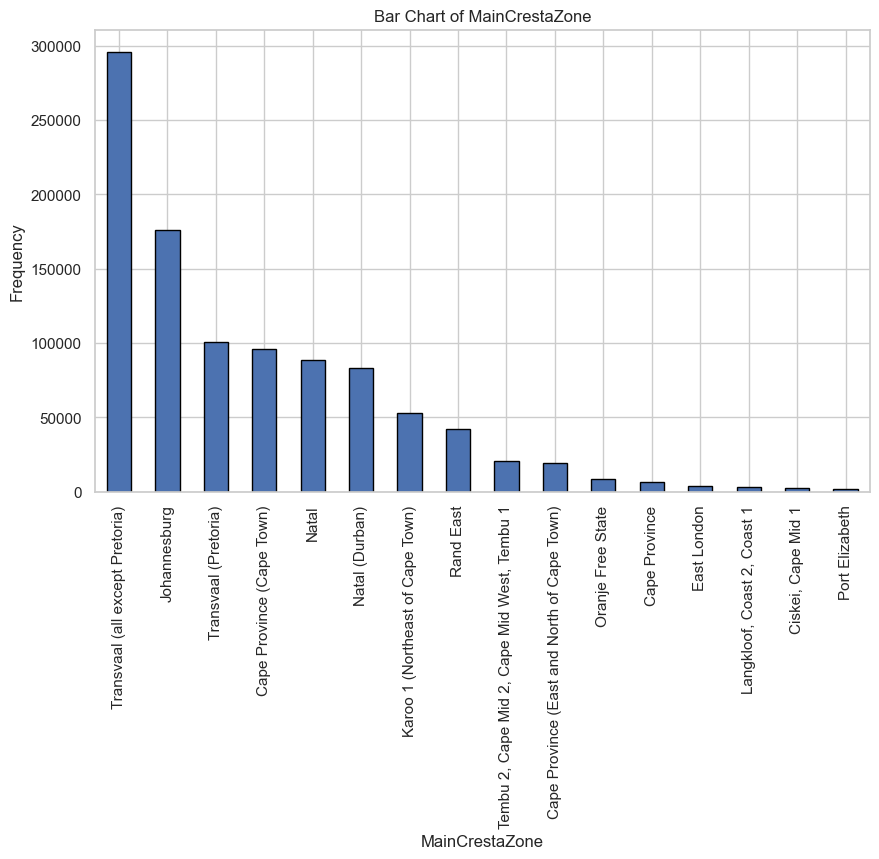

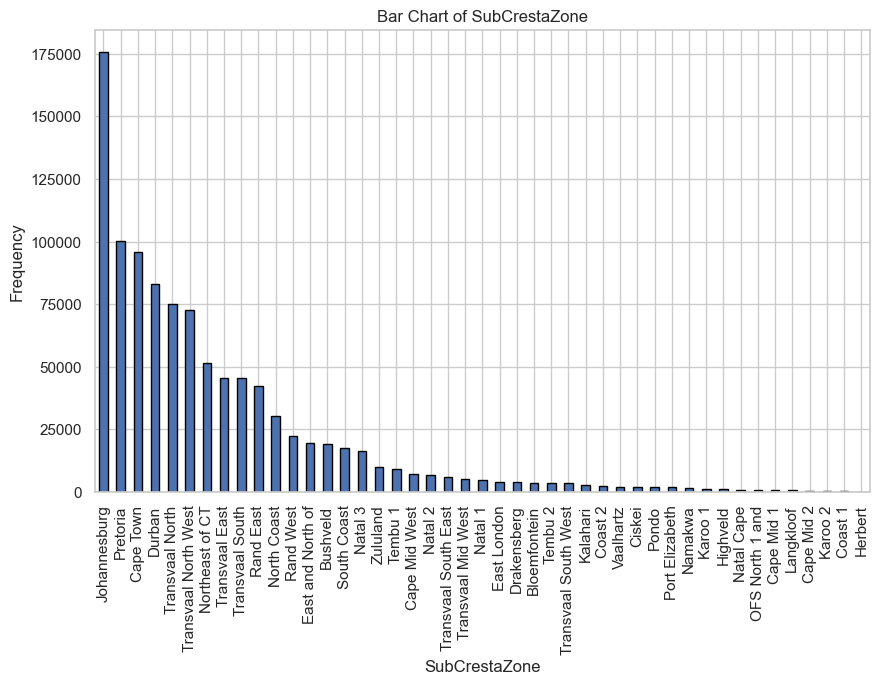

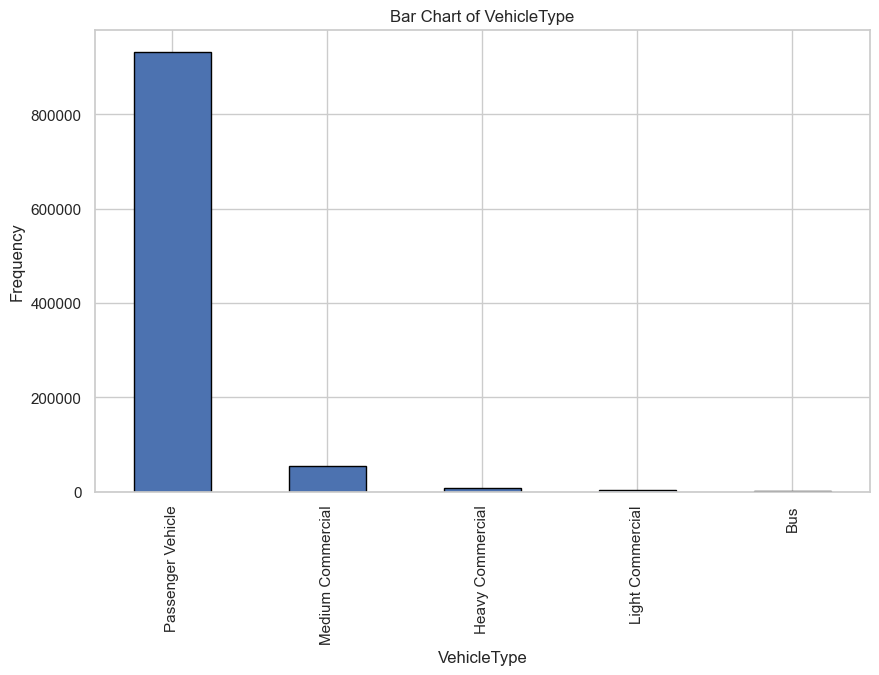

In [97]:
# Specify the categorical columns you want to plot bar charts for
categorical_columns_to_plot = ['Province', 'VehicleType', 'CoverType','Gender','Citizenship','Province','MainCrestaZone','SubCrestaZone','VehicleType']  
# Plot bar charts for specified categorical columns
for col in categorical_columns_to_plot:
    plt.figure(figsize=(10, 6))
    df[col].value_counts().plot(kind='bar', edgecolor='black')
    plt.title(f'Bar Chart of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

### Bivariate/Multivariate Analysis

Explore relationships (e.g., TotalPremium vs. Province) using scatter plots and correlation matrices.

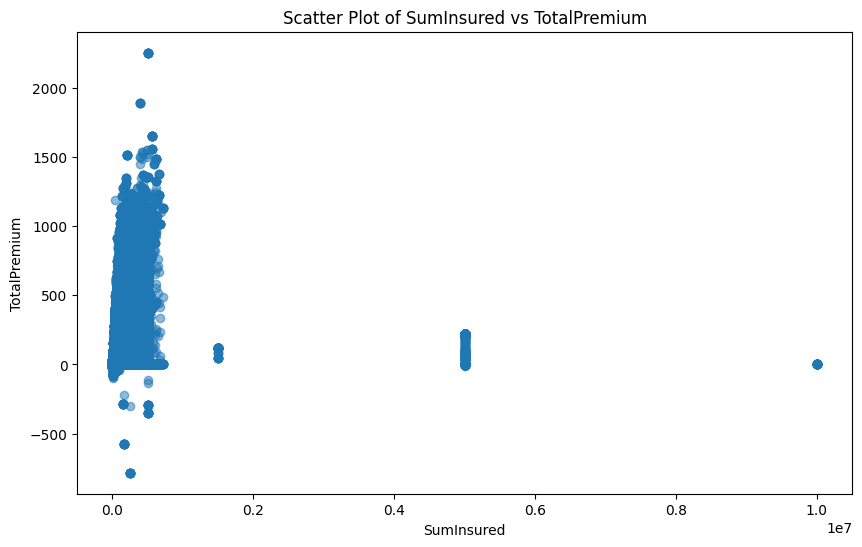

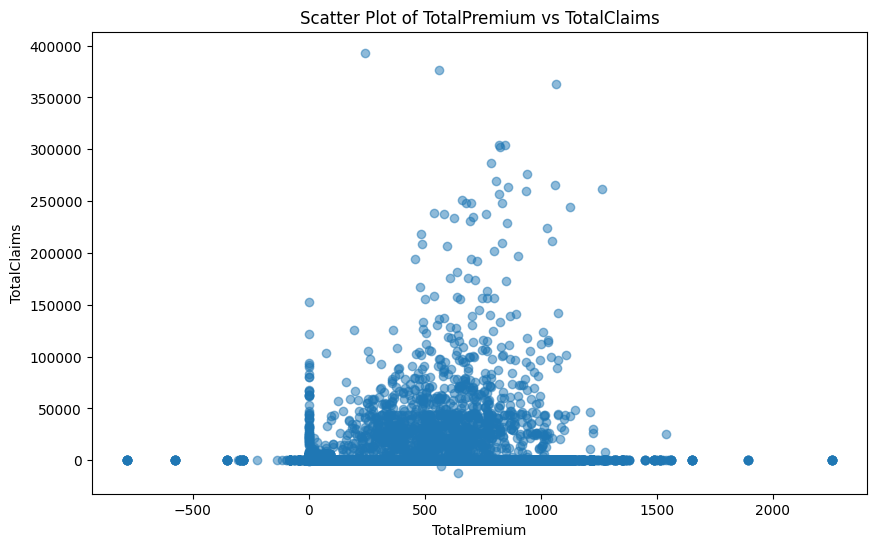

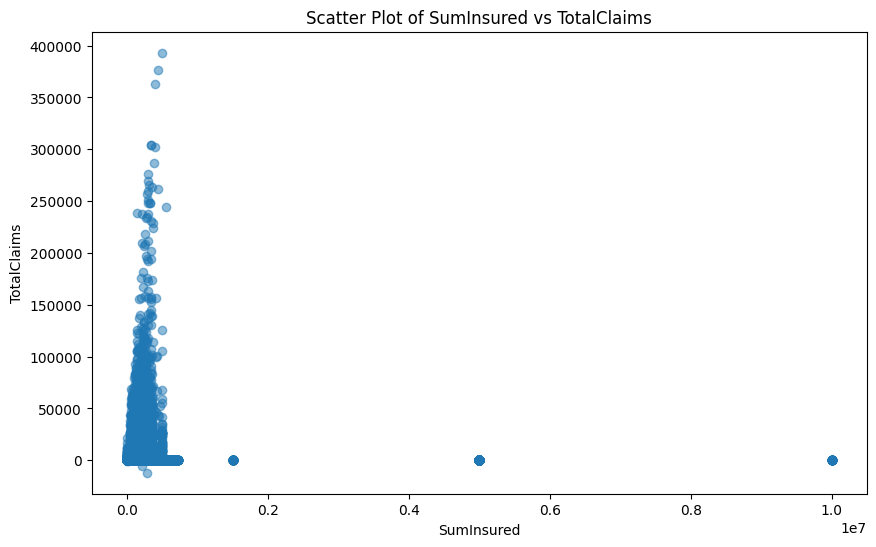

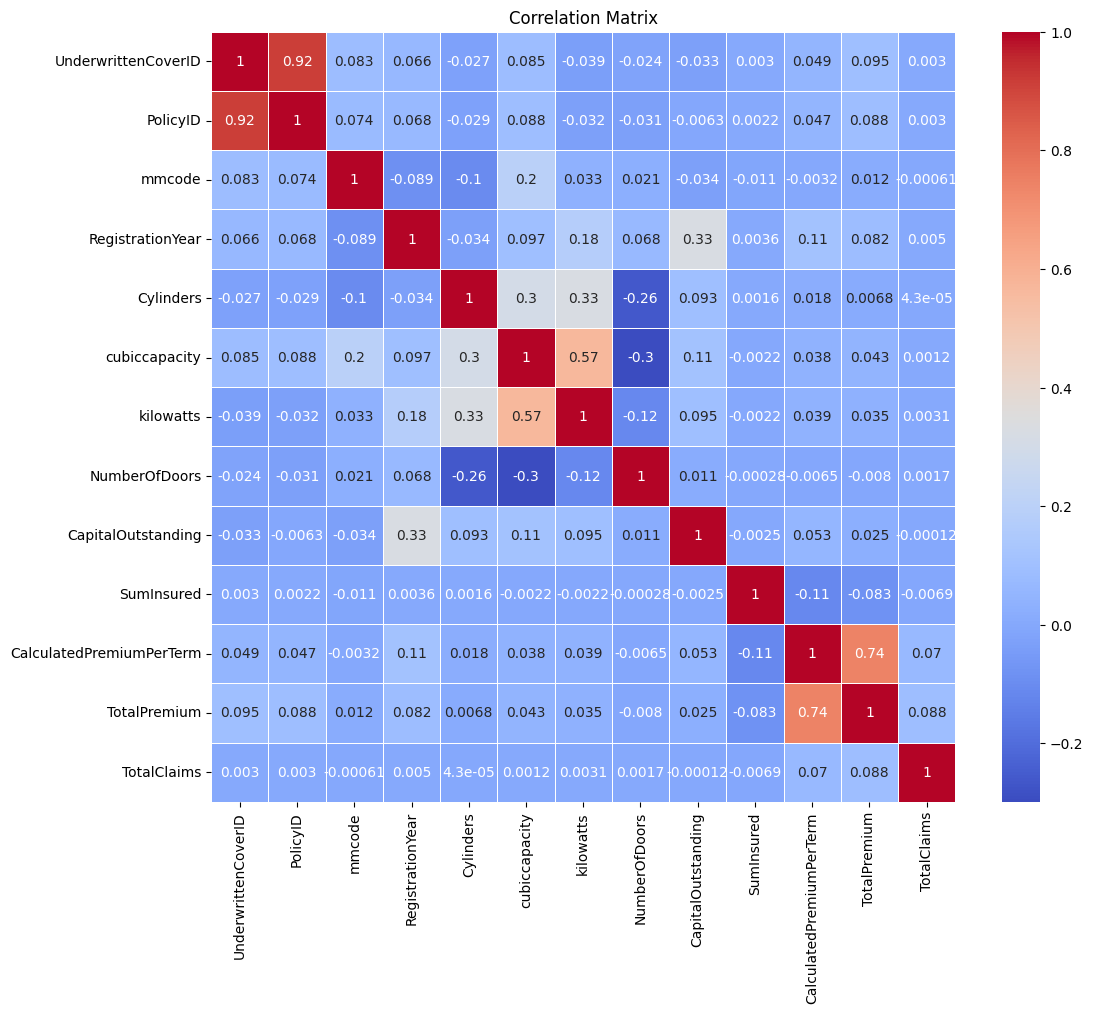

In [51]:
# Scatter plots for pairs of numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64', 'Int64']).columns

# Plot scatter plots for a few pairs of numerical columns
pairs = [('SumInsured', 'TotalPremium'), ('TotalPremium', 'TotalClaims'), ('SumInsured', 'TotalClaims')]

for x, y in pairs:
    plt.figure(figsize=(10, 6))
    plt.scatter(df[x], df[y], alpha=0.5)
    plt.title(f'Scatter Plot of {x} vs {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

# Correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

C:\Users\zelalem.wubet\AppData\Local\Temp\ipykernel_29008\1843302293.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  province_claims = df.groupby('Province')['TotalClaims'].agg(['sum', 'mean']).reset_index()


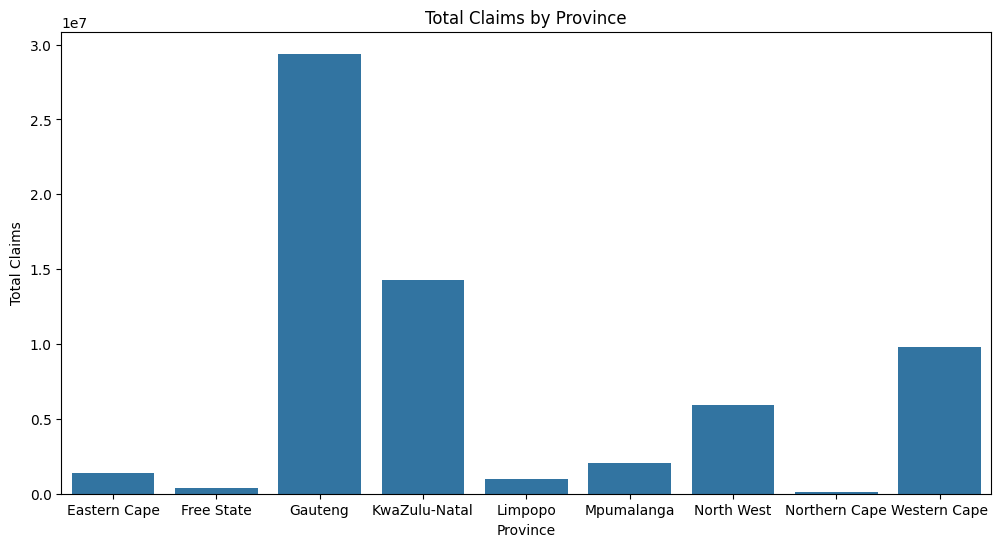

C:\Users\zelalem.wubet\AppData\Local\Temp\ipykernel_29008\1843302293.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vehicle_premiums = df.groupby('VehicleType')['CalculatedPremiumPerTerm'].mean().reset_index()


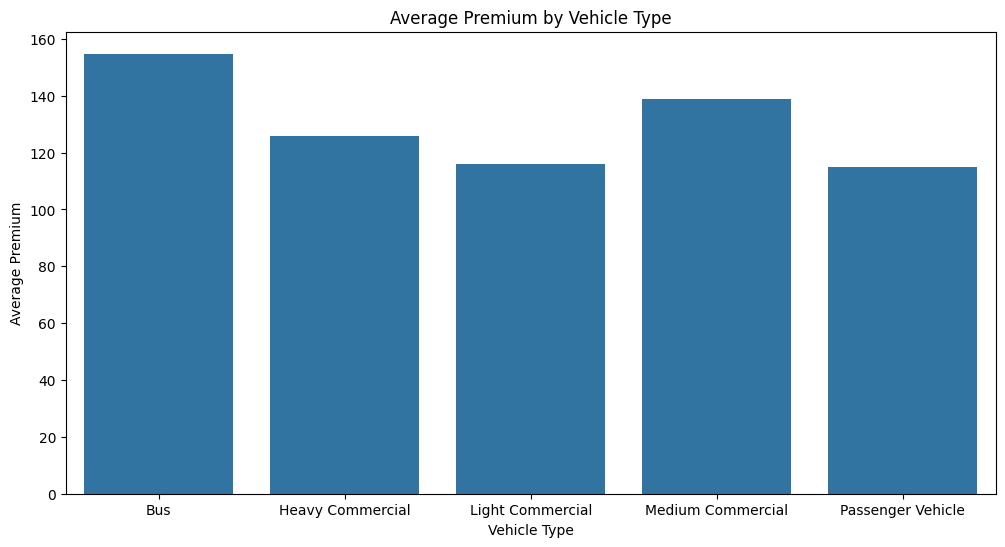

In [52]:
# Group by Province and calculate total and average claims
province_claims = df.groupby('Province')['TotalClaims'].agg(['sum', 'mean']).reset_index()

# Plotting total claims by province
plt.figure(figsize=(12, 6))
sns.barplot(x='Province', y='sum', data=province_claims)
plt.title('Total Claims by Province')
plt.xlabel('Province')
plt.ylabel('Total Claims')
plt.show()

# Group by VehicleType and calculate average premium
vehicle_premiums = df.groupby('VehicleType')['CalculatedPremiumPerTerm'].mean().reset_index()

# Plotting average premium by vehicle type
plt.figure(figsize=(12, 6))
sns.barplot(x='VehicleType', y='CalculatedPremiumPerTerm', data=vehicle_premiums)
plt.title('Average Premium by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Premium')
plt.show()

## Stacked Bar Chart: Cover Type Distribution by Province

C:\Users\zelalem.wubet\AppData\Local\Temp\ipykernel_29008\2540942060.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Province')['CoverType'].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(12, 8))


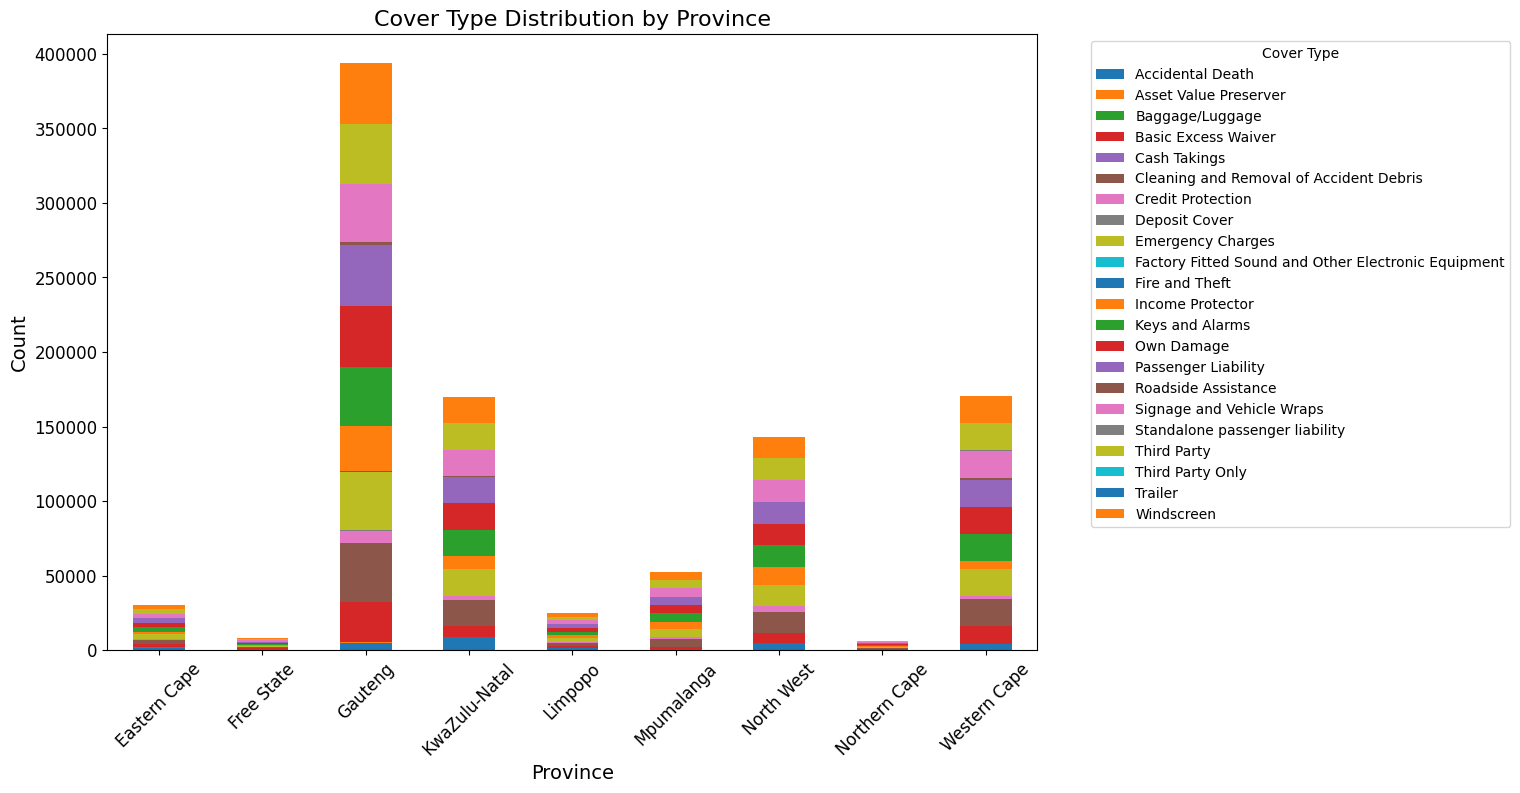

In [53]:
df.groupby('Province')['CoverType'].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Cover Type Distribution by Province', fontsize=16)
plt.xlabel('Province', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Cover Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()




## Time Series Plot for Premiums and Claims

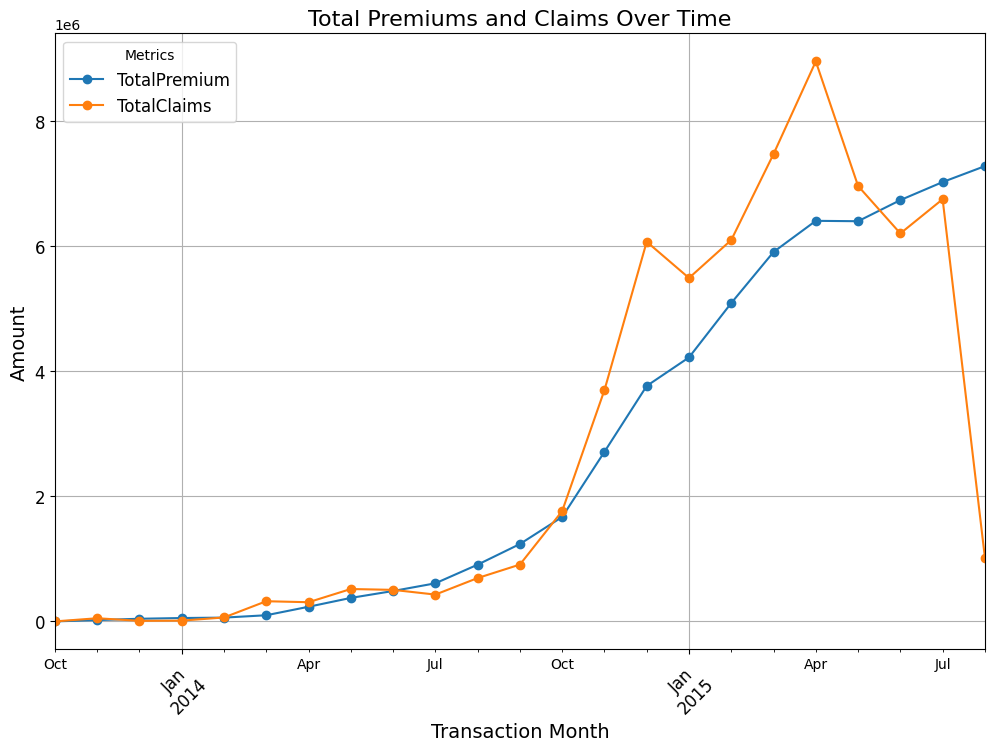

In [54]:
df.groupby('TransactionMonth')[['TotalPremium', 'TotalClaims']].sum().plot(figsize=(12, 8), marker='o')
plt.title('Total Premiums and Claims Over Time', fontsize=16)
plt.xlabel('Transaction Month', fontsize=14)
plt.ylabel('Amount', fontsize=14)
plt.legend(title='Metrics', fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()


### Descriptive statistics for numerical columns

In [55]:
# Descriptive statistics for numerical columns
numerical_columns = ['TotalPremium', 'TotalClaims', 'CapitalOutstanding', 'SumInsured']
summary_stats = df[numerical_columns].describe()
print(summary_stats)

        TotalPremium    TotalClaims  CapitalOutstanding    SumInsured
count  999546.000000  999546.000000       999546.000000  9.995460e+05
mean       61.372315      64.340071        52634.281429  6.038693e+05
std       157.013943    2369.564716       111423.147454  1.507340e+06
min      -782.576754  -12002.412281           -2.000000  1.000000e-02
25%         0.000000       0.000000            0.000000  5.000000e+03
50%         2.179737       0.000000            0.000000  7.500000e+03
75%        21.929825       0.000000            0.000000  2.500000e+05
max      2253.507281  393092.105263       700000.000000  1.000000e+07


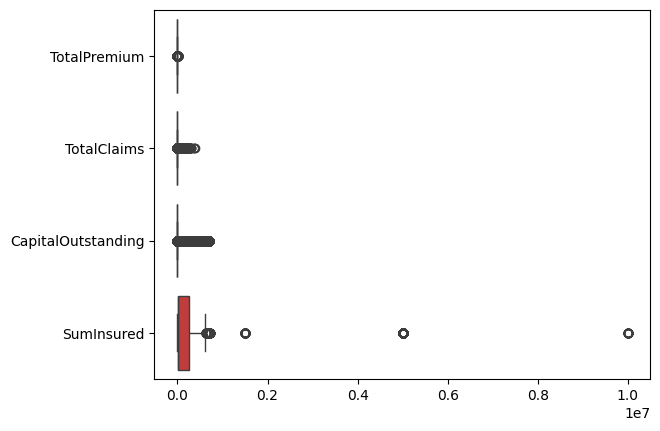

In [56]:
# Box plot to detect outliers
sns.boxplot(data=df[numerical_columns], orient='h')
plt.show()


## Data Comparison (Finding Insights)

### 1. Group Data by Demographic Variables

In [57]:
# Group by Gender and calculate mean for TotalClaims and TotalPremium
gender_group = df.groupby('Gender')[['TotalClaims', 'TotalPremium']].mean().reset_index()
print(gender_group)


          Gender  TotalClaims  TotalPremium
0         Female    37.046055     45.074841
1           Male    32.620312     36.904566
2  Not specified    65.963816     62.591007


C:\Users\zelalem.wubet\AppData\Local\Temp\ipykernel_29008\2984116175.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_group = df.groupby('Gender')[['TotalClaims', 'TotalPremium']].mean().reset_index()


In [58]:
# Group by Citizenship and calculate mean for TotalClaims and TotalPremium
citizenship_group = df.groupby('Citizenship')[['TotalClaims', 'TotalPremium']].mean().reset_index()
print(citizenship_group)


  Citizenship  TotalClaims  TotalPremium
0                65.554393     61.747355
1          AF     0.000000     62.190731
2          ZA    54.573043     57.937073
3          ZW     1.845292     83.364950


C:\Users\zelalem.wubet\AppData\Local\Temp\ipykernel_29008\1659289523.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  citizenship_group = df.groupby('Citizenship')[['TotalClaims', 'TotalPremium']].mean().reset_index()


### 2. Visualize the Relationship Between Demographic Data and Financial Data

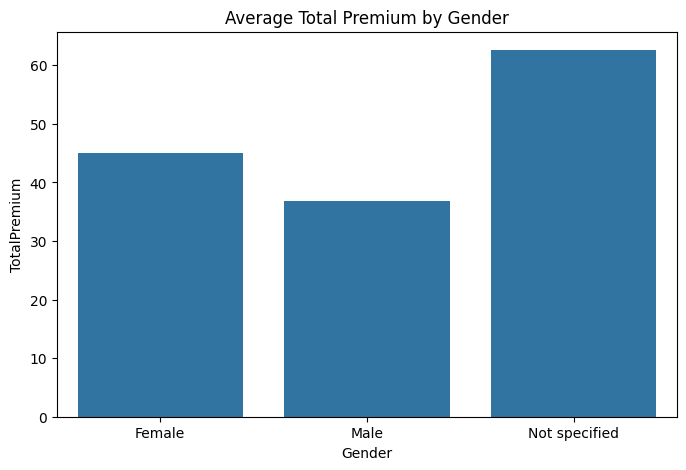

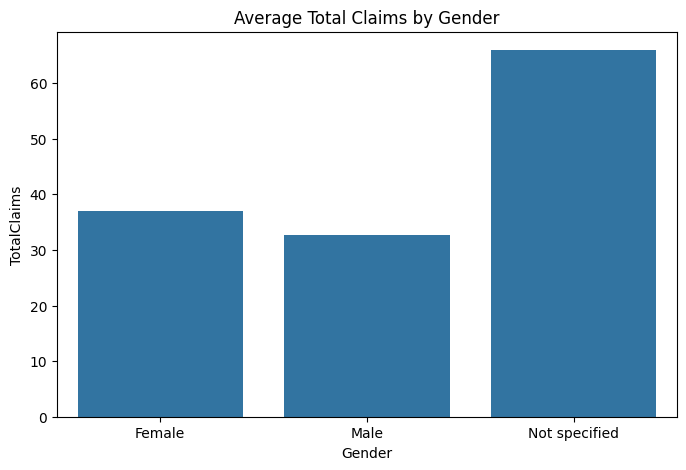

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for Gender
plt.figure(figsize=(8, 5))
sns.barplot(x='Gender', y='TotalPremium', data=gender_group)
plt.title('Average Total Premium by Gender')
plt.show()

# Bar plot for Gender and TotalClaims
plt.figure(figsize=(8, 5))
sns.barplot(x='Gender', y='TotalClaims', data=gender_group)
plt.title('Average Total Claims by Gender')
plt.show()


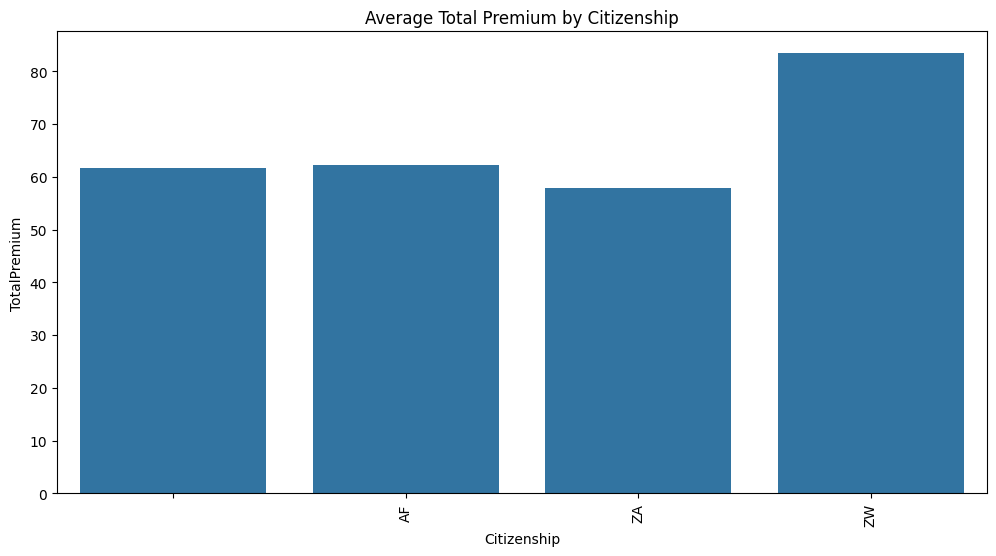

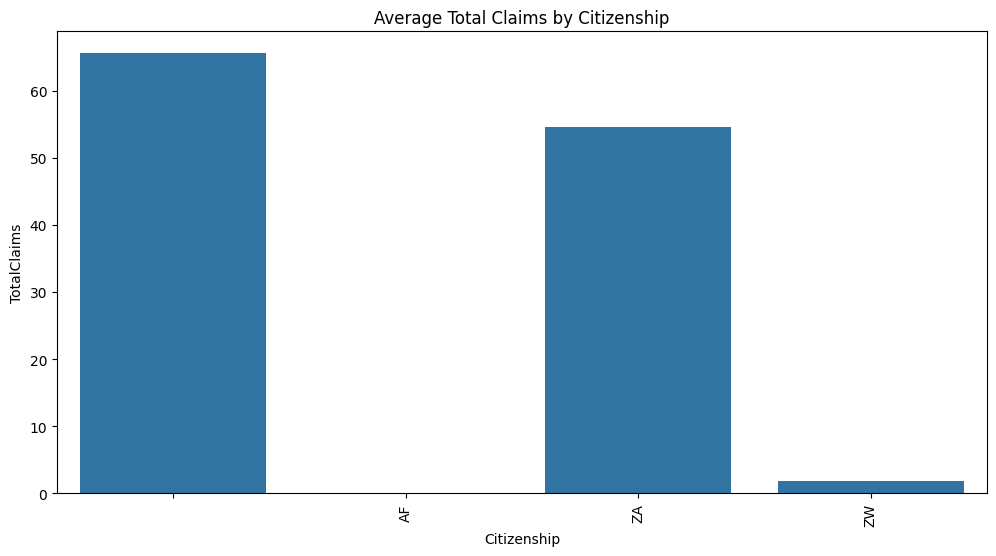

In [60]:
# Bar plot for Citizenship
plt.figure(figsize=(12, 6))
sns.barplot(x='Citizenship', y='TotalPremium', data=citizenship_group)
plt.title('Average Total Premium by Citizenship')
plt.xticks(rotation=90)
plt.show()

# Bar plot for Citizenship and TotalClaims
plt.figure(figsize=(12, 6))
sns.barplot(x='Citizenship', y='TotalClaims', data=citizenship_group)
plt.title('Average Total Claims by Citizenship')
plt.xticks(rotation=90)
plt.show()


### 3. Compare Across Multiple Demographic Variables

C:\Users\zelalem.wubet\AppData\Local\Temp\ipykernel_29008\759789927.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  demographic_group = df.groupby(['Gender', 'MaritalStatus'])[['TotalClaims', 'TotalPremium']].mean().reset_index()


          Gender  MaritalStatus  TotalClaims  TotalPremium
0         Female        Married   101.992142     73.526751
1         Female  Not specified    29.249509     41.659291
2         Female         Single          NaN           NaN
3           Male        Married          NaN           NaN
4           Male  Not specified    33.992899     37.834002
5           Male         Single    20.177659     28.479117
6  Not specified        Married    57.986043     82.072208
7  Not specified  Not specified    65.969304     62.577606
8  Not specified         Single          NaN           NaN


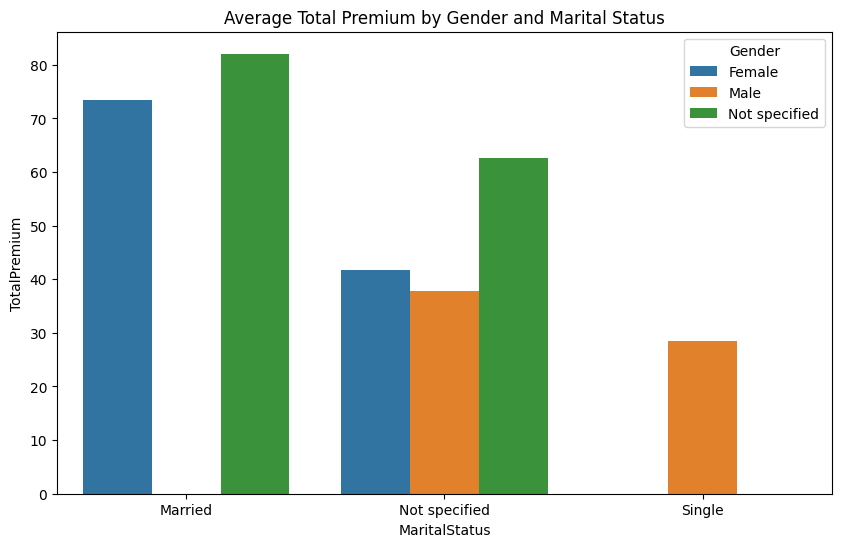

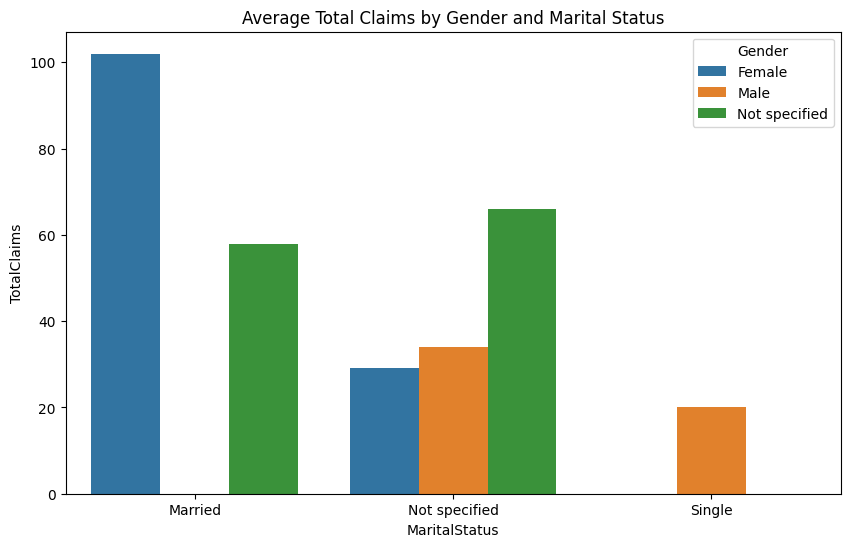

In [61]:
# Group by Gender and MaritalStatus
demographic_group = df.groupby(['Gender', 'MaritalStatus'])[['TotalClaims', 'TotalPremium']].mean().reset_index()
print(demographic_group)

# Bar plot for Gender and MaritalStatus vs TotalPremium
plt.figure(figsize=(10, 6))
sns.barplot(x='MaritalStatus', y='TotalPremium', hue='Gender', data=demographic_group)
plt.title('Average Total Premium by Gender and Marital Status')
plt.show()

# Bar plot for Gender and MaritalStatus vs TotalClaims
plt.figure(figsize=(10, 6))
sns.barplot(x='MaritalStatus', y='TotalClaims', hue='Gender', data=demographic_group)
plt.title('Average Total Claims by Gender and Marital Status')
plt.show()


### 4. Explore Trends Over Geography

C:\Users\zelalem.wubet\AppData\Local\Temp\ipykernel_29008\2893862754.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  province_group = df.groupby('Province')[['TotalClaims', 'TotalPremium']].mean().reset_index()


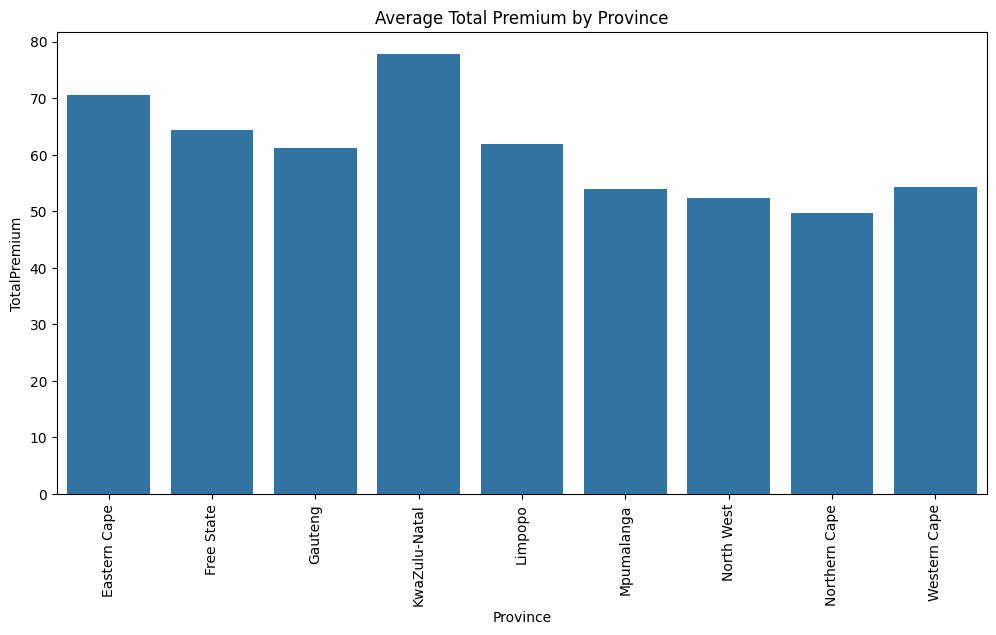

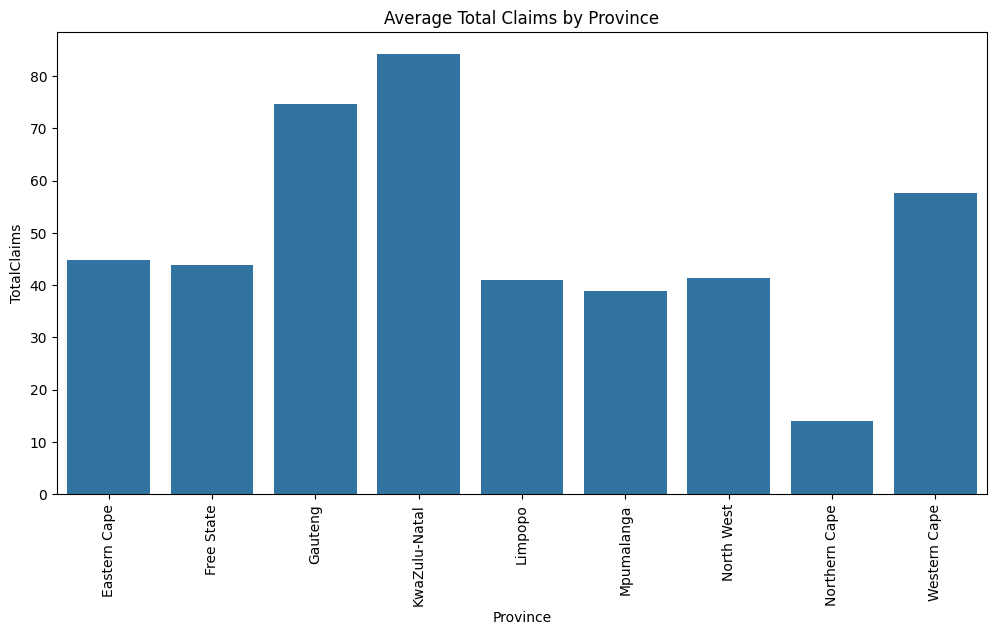

In [62]:
# Group by Province
province_group = df.groupby('Province')[['TotalClaims', 'TotalPremium']].mean().reset_index()

# Bar plot for Province
plt.figure(figsize=(12, 6))
sns.barplot(x='Province', y='TotalPremium', data=province_group)
plt.title('Average Total Premium by Province')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Province', y='TotalClaims', data=province_group)
plt.title('Average Total Claims by Province')
plt.xticks(rotation=90)
plt.show()


### 5. Use Box Plots to Show the Distribution of Total Premium and Claims by Demographic Data

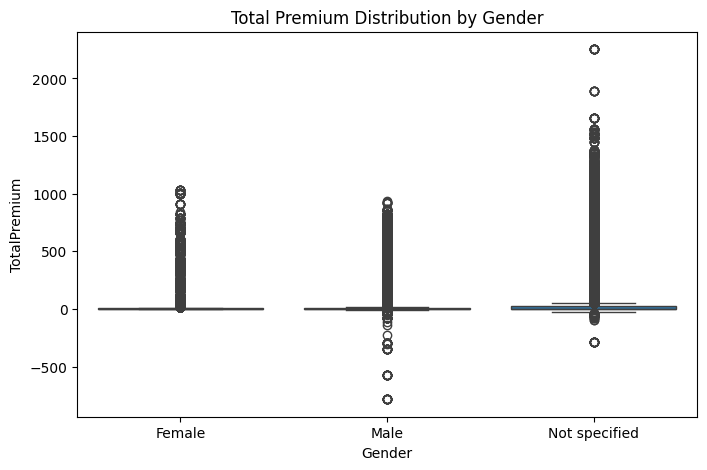

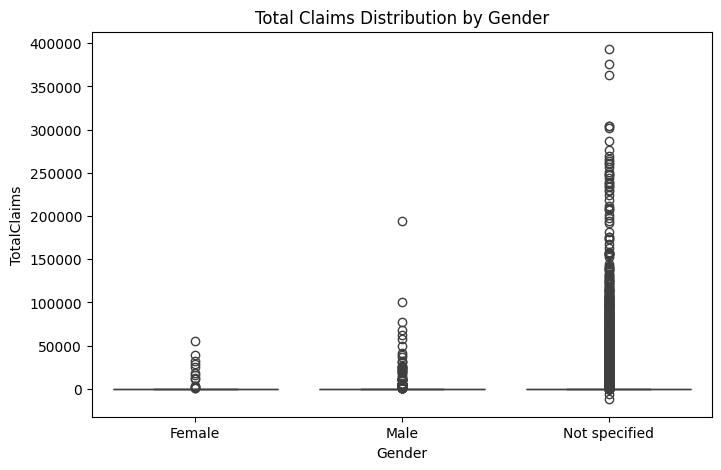

In [63]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Gender', y='TotalPremium', data=df)
plt.title('Total Premium Distribution by Gender')
plt.show()

# Box plot for TotalClaims by Gender
plt.figure(figsize=(8, 5))
sns.boxplot(x='Gender', y='TotalClaims', data=df)
plt.title('Total Claims Distribution by Gender')
plt.show()


### 6. Correlation Between Demographics and Premium/Claims

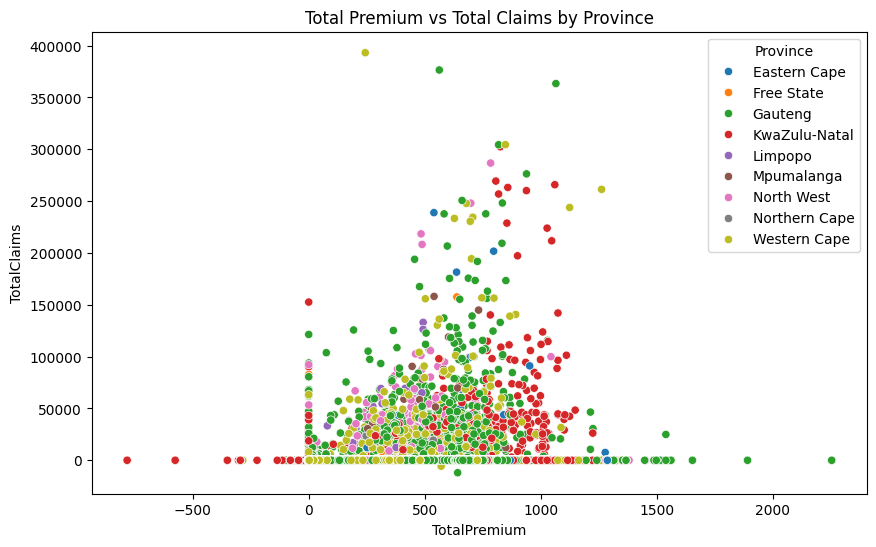

In [64]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalPremium', y='TotalClaims', hue='Province', data=df)
plt.title('Total Premium vs Total Claims by Province')
plt.show()


### VehicleType and calculate mean for TotalClaims and TotalPremium

In [65]:
# Group by VehicleType and calculate mean for TotalClaims and TotalPremium
vehicle_type_group = df.groupby('VehicleType')[['TotalClaims', 'TotalPremium']].mean().reset_index()
print(vehicle_type_group)


         VehicleType  TotalClaims  TotalPremium
0                Bus    12.024865     87.586075
1   Heavy Commercial   101.401781     62.281835
2   Light Commercial    15.512574     66.845656
3  Medium Commercial    76.315030     72.663620
4  Passenger Vehicle    63.594898     60.670670


C:\Users\zelalem.wubet\AppData\Local\Temp\ipykernel_29008\3943173092.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vehicle_type_group = df.groupby('VehicleType')[['TotalClaims', 'TotalPremium']].mean().reset_index()


###  Make (Manufacturer) and calculate mean for TotalClaims and TotalPremium

C:\Users\zelalem.wubet\AppData\Local\Temp\ipykernel_29008\3820622646.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  make_group = df.groupby('make')[['TotalClaims', 'TotalPremium']].mean().reset_index()


                                   make  TotalClaims  TotalPremium
0                                  AUDI   137.843083     50.799827
1                                 B.A.W   132.934016     76.872229
2                                   BMW    90.558050     45.658312
3                                 C.A.M    43.021964     37.571153
4   CHERY                                   0.000000     47.384840
5                             CHEVROLET     9.015870     32.873440
6   CITROEN                                 0.000000     29.902841
7                                   CMC    61.210485     44.277007
8                              DAIHATSU     0.000000     43.859649
9                                  FIAT   108.625642    106.317863
10                                 FORD     4.778627     49.429381
11  FORD                                    0.000000     36.428579
12                                FOTON     3.488588     41.283083
13  GEELY                                   0.000000    104.17

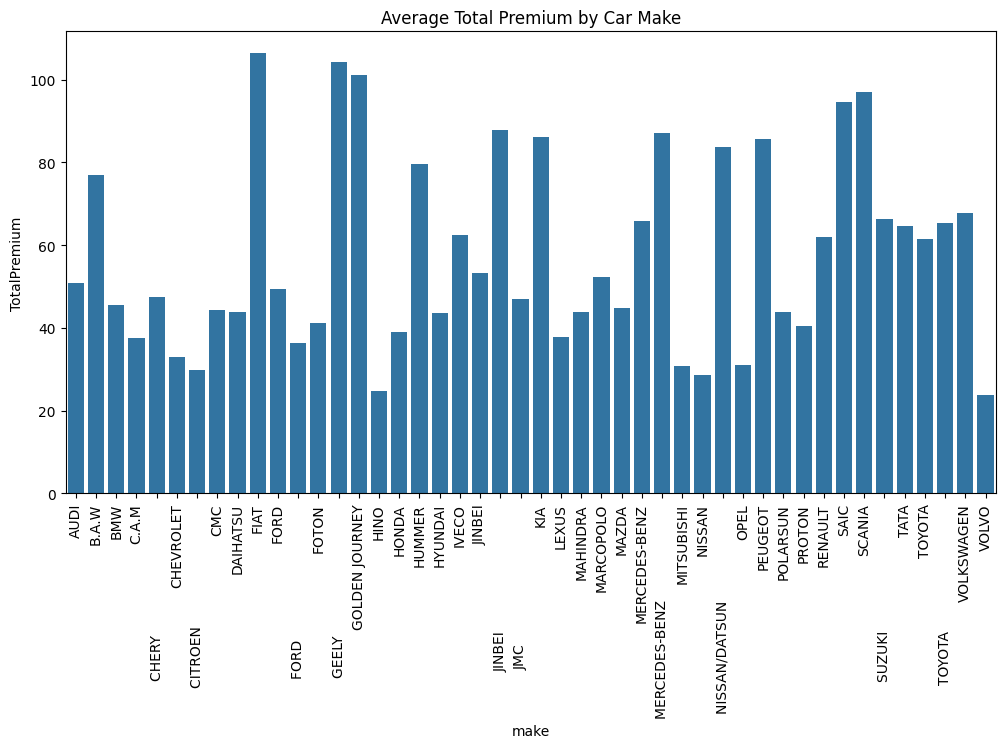

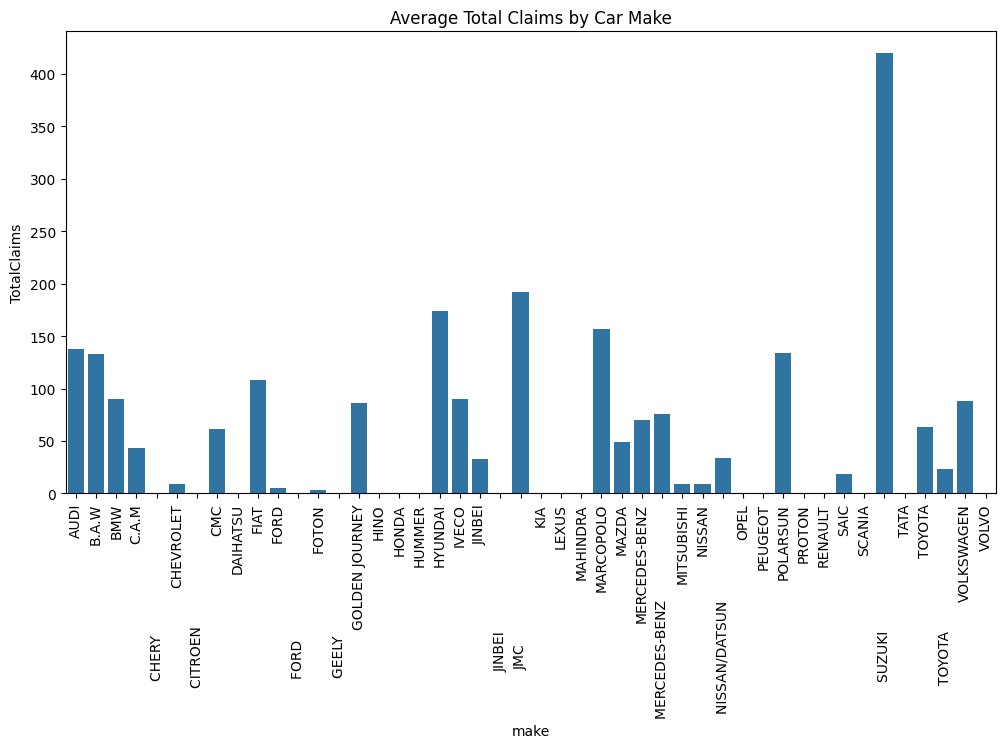

In [66]:
# Group by Make and calculate mean for TotalClaims and TotalPremium
make_group = df.groupby('make')[['TotalClaims', 'TotalPremium']].mean().reset_index()
print(make_group)

# Bar plot for Make vs TotalPremium
plt.figure(figsize=(12, 6))
sns.barplot(x='make', y='TotalPremium', data=make_group)
plt.title('Average Total Premium by Car Make')
plt.xticks(rotation=90)
plt.show()

# Bar plot for Make vs TotalClaims
plt.figure(figsize=(12, 6))
sns.barplot(x='make', y='TotalClaims', data=make_group)
plt.title('Average Total Claims by Car Make')
plt.xticks(rotation=90)
plt.show()


### RegistrationYear and calculate mean for TotalClaims and TotalPremium

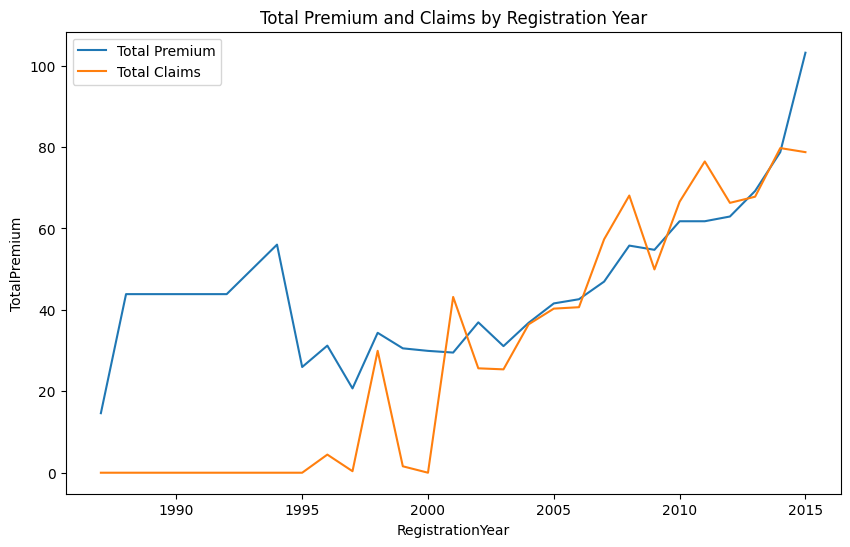

In [67]:
# Group by RegistrationYear and calculate mean for TotalClaims and TotalPremium
year_group = df.groupby('RegistrationYear')[['TotalClaims', 'TotalPremium']].mean().reset_index()

# Line plot for RegistrationYear vs TotalPremium and TotalClaims
plt.figure(figsize=(10, 6))
sns.lineplot(x='RegistrationYear', y='TotalPremium', data=year_group, label='Total Premium')
sns.lineplot(x='RegistrationYear', y='TotalClaims', data=year_group, label='Total Claims')
plt.title('Total Premium and Claims by Registration Year')
plt.show()


###  Explore Car Features in Relation to Premium and Claims

C:\Users\zelalem.wubet\AppData\Local\Temp\ipykernel_29008\3844569670.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bodytype_group = df.groupby('bodytype')[['TotalClaims', 'TotalPremium']].mean().reset_index()


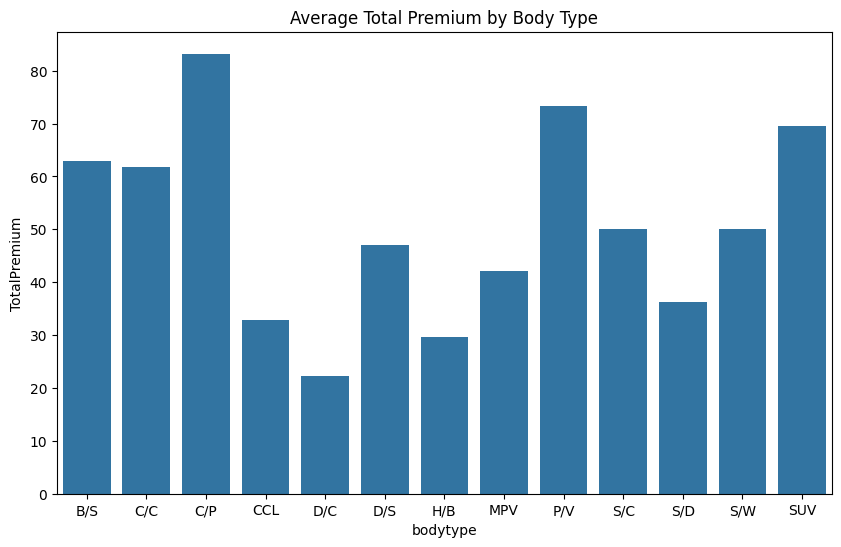

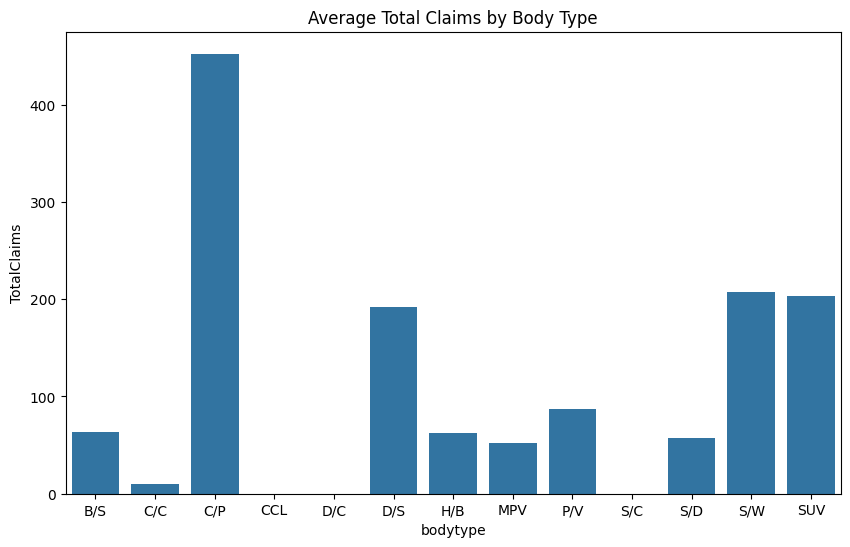

In [68]:
# Group by BodyType and calculate mean for TotalClaims and TotalPremium
bodytype_group = df.groupby('bodytype')[['TotalClaims', 'TotalPremium']].mean().reset_index()

# Bar plot for Bodytype vs TotalPremium
plt.figure(figsize=(10, 6))
sns.barplot(x='bodytype', y='TotalPremium', data=bodytype_group)
plt.title('Average Total Premium by Body Type')
plt.show()

# Bar plot for Bodytype vs TotalClaims
plt.figure(figsize=(10, 6))
sns.barplot(x='bodytype', y='TotalClaims', data=bodytype_group)
plt.title('Average Total Claims by Body Type')
plt.show()


### Analyze the Impact of Security Features

C:\Users\zelalem.wubet\AppData\Local\Temp\ipykernel_29008\1695695583.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  alarm_group = df.groupby('AlarmImmobiliser')[['TotalClaims', 'TotalPremium']].mean().reset_index()


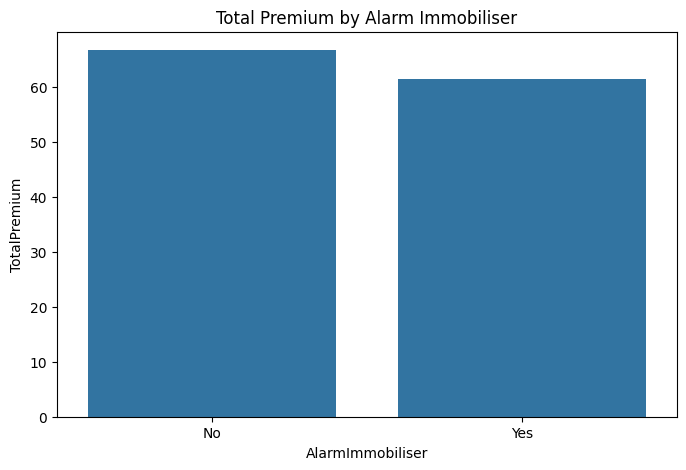

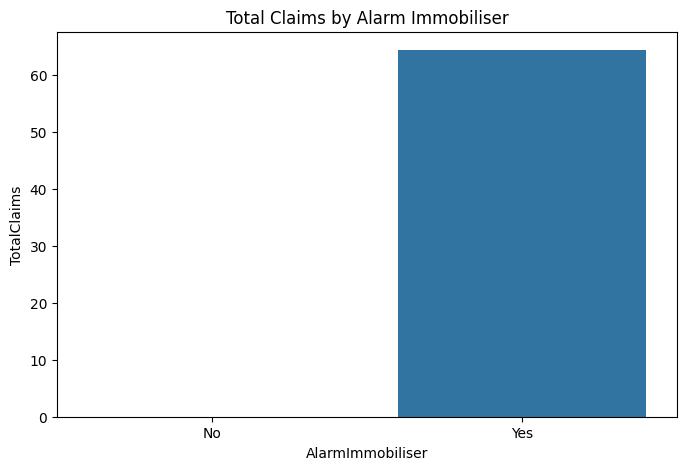

In [69]:
# Group by AlarmImmobiliser and calculate mean for TotalClaims and TotalPremium
alarm_group = df.groupby('AlarmImmobiliser')[['TotalClaims', 'TotalPremium']].mean().reset_index()

# Bar plot for AlarmImmobiliser vs TotalPremium
plt.figure(figsize=(8, 5))
sns.barplot(x='AlarmImmobiliser', y='TotalPremium', data=alarm_group)
plt.title('Total Premium by Alarm Immobiliser')
plt.show()

# Bar plot for AlarmImmobiliser vs TotalClaims
plt.figure(figsize=(8, 5))
sns.barplot(x='AlarmImmobiliser', y='TotalClaims', data=alarm_group)
plt.title('Total Claims by Alarm Immobiliser')
plt.show()


### Analyze how different types of coverage affect the premium and claims

C:\Users\zelalem.wubet\AppData\Local\Temp\ipykernel_29008\1919185723.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cover_type_group = df.groupby('CoverType')[['TotalClaims', 'TotalPremium']].mean().reset_index()
C:\Users\zelalem.wubet\AppData\Local\Temp\ipykernel_29008\1919185723.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CoverType', y='TotalPremium', data=cover_type_group, palette='plasma')


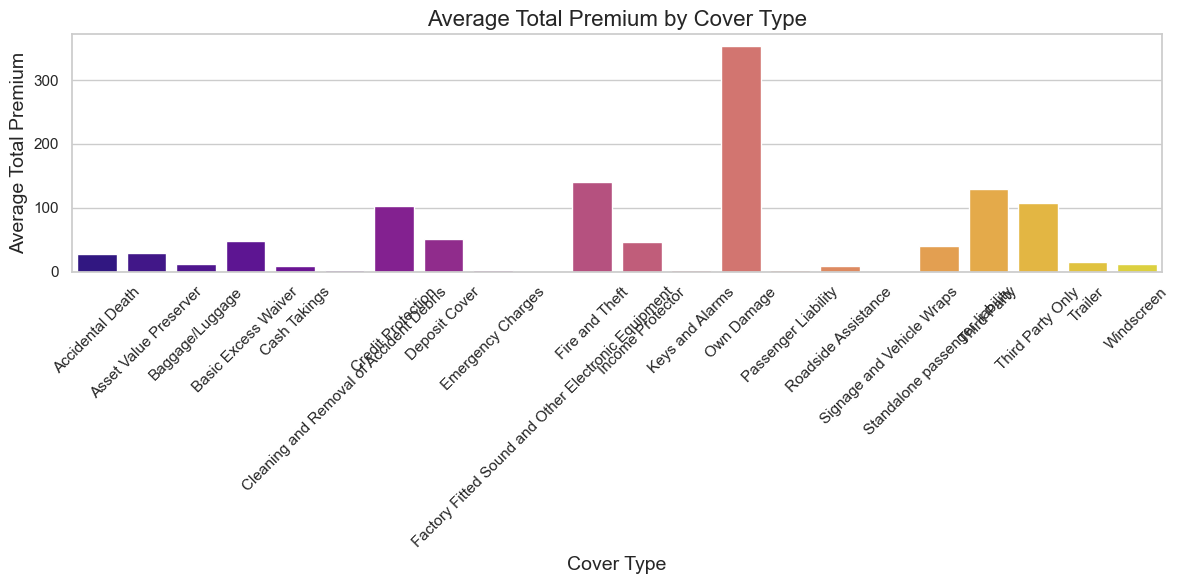

C:\Users\zelalem.wubet\AppData\Local\Temp\ipykernel_29008\1919185723.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CoverType', y='TotalClaims', data=cover_type_group, palette='plasma')


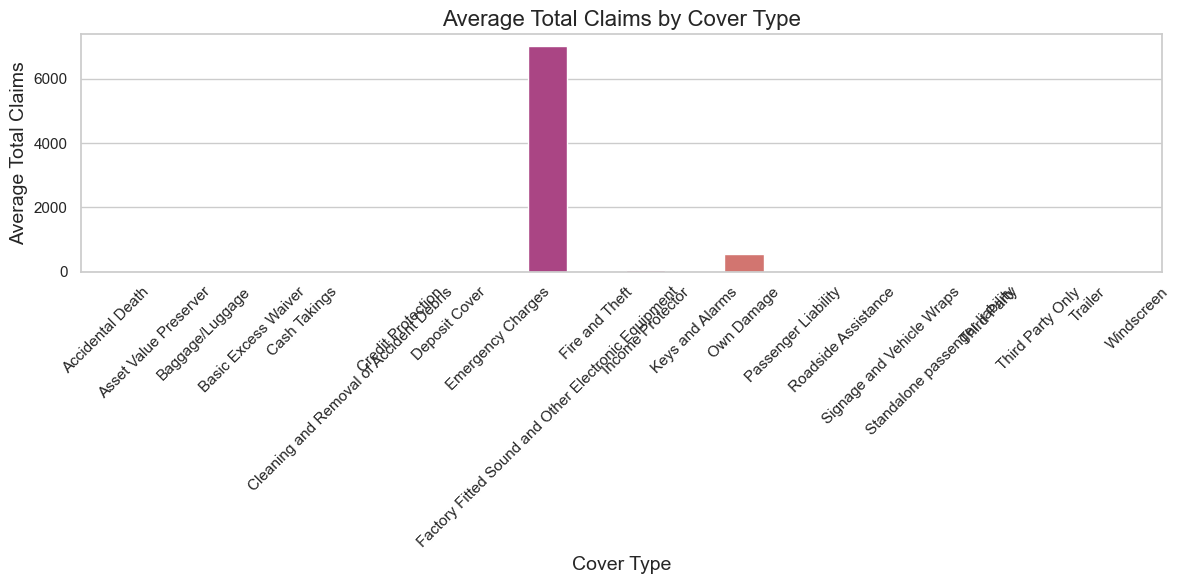

In [90]:

# Group by CoverType and calculate mean for TotalClaims and TotalPremium
cover_type_group = df.groupby('CoverType')[['TotalClaims', 'TotalPremium']].mean().reset_index()

# Set the style of seaborn
sns.set(style="whitegrid")

# Bar plot for CoverType vs TotalPremium
plt.figure(figsize=(12, 6))
sns.barplot(x='CoverType', y='TotalPremium', data=cover_type_group, palette='plasma')
plt.title('Average Total Premium by Cover Type', fontsize=16)
plt.xlabel('Cover Type', fontsize=14)
plt.ylabel('Average Total Premium', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar plot for CoverType vs TotalClaims
plt.figure(figsize=(12, 6))
sns.barplot(x='CoverType', y='TotalClaims', data=cover_type_group, palette='plasma')
plt.title('Average Total Claims by Cover Type', fontsize=16)
plt.xlabel('Cover Type', fontsize=14)
plt.ylabel('Average Total Claims', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\zelalem.wubet\AppData\Local\Temp\ipykernel_29008\484141524.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loss_ratio_by_province = df.groupby('Province').apply(lambda x: (x['TotalClaims'].sum() / x['TotalPremium'].sum()) * 100)
C:\Users\zelalem.wubet\AppData\Local\Temp\ipykernel_29008\484141524.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  loss_ratio_by_province = df.groupby('Province').apply(lambda x: (x['TotalClaims'].sum() / x['TotalPremium'].sum()) * 100)


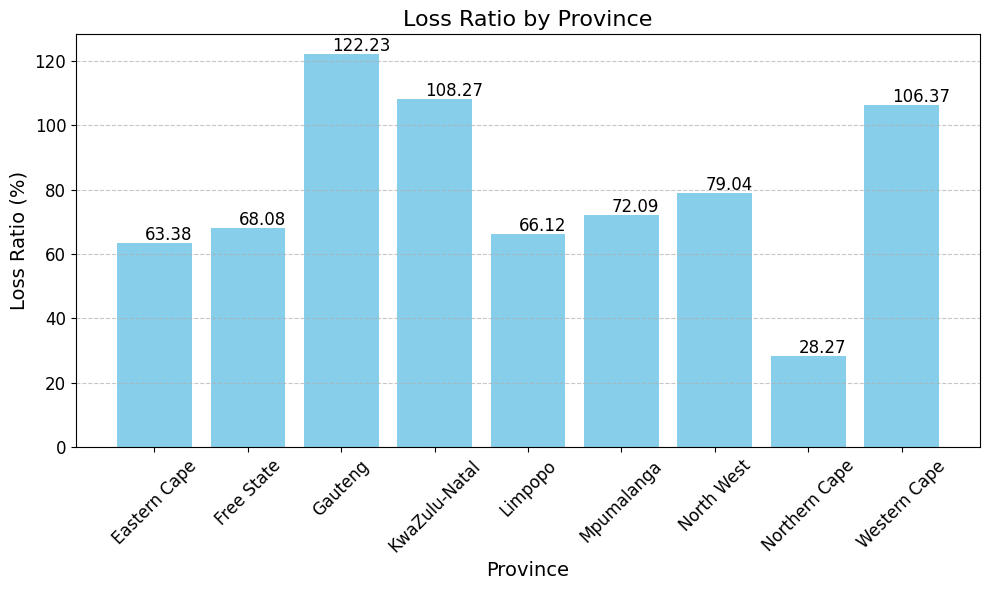

In [ ]:
# Calculate loss ratio by province
loss_ratio_by_province = df.groupby('Province').apply(lambda x: (x['TotalClaims'].sum() / x['TotalPremium'].sum()) * 100)

# Plot the graph
plt.figure(figsize=(10, 6))
bars = plt.bar(loss_ratio_by_province.index, loss_ratio_by_province, color='skyblue')
plt.title('Loss Ratio by Province', fontsize=16)
plt.xlabel('Province', fontsize=14)
plt.ylabel('Loss Ratio (%)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add text annotations on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, yval + 1, round(yval, 2), fontsize=12)

plt.tight_layout()

# Show the plot
plt.show()

C:\Users\zelalem.wubet\AppData\Local\Temp\ipykernel_29008\484141524.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loss_ratio_by_province = df.groupby('Province').apply(lambda x: (x['TotalClaims'].sum() / x['TotalPremium'].sum()) * 100)
C:\Users\zelalem.wubet\AppData\Local\Temp\ipykernel_29008\484141524.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  loss_ratio_by_province = df.groupby('Province').apply(lambda x: (x['TotalClaims'].sum() / x['TotalPremium'].sum()) * 100)


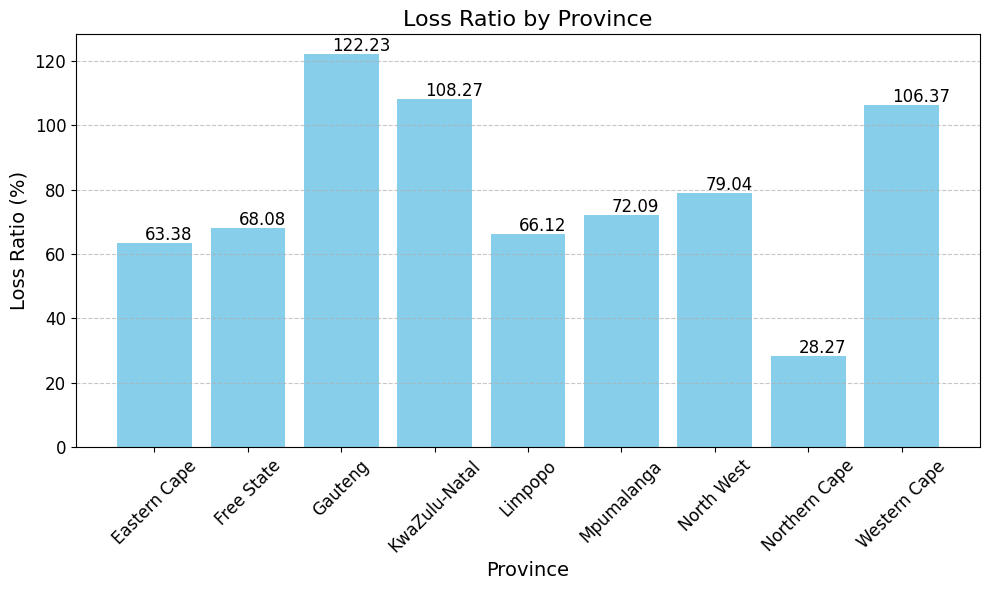

In [ ]:
# Calculate loss ratio by province
loss_ratio_by_province = df.groupby('Province').apply(lambda x: (x['TotalClaims'].sum() / x['TotalPremium'].sum()) * 100)

# Plot the graph
plt.figure(figsize=(10, 6))
bars = plt.bar(loss_ratio_by_province.index, loss_ratio_by_province, color='skyblue')
plt.title('Loss Ratio by Province', fontsize=16)
plt.xlabel('Province', fontsize=14)
plt.ylabel('Loss Ratio (%)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add text annotations on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, yval + 1, round(yval, 2), fontsize=12)

plt.tight_layout()

# Show the plot
plt.show()

C:\Users\zelalem.wubet\AppData\Local\Temp\ipykernel_29008\141090611.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  term_frequency_group = df.groupby('TermFrequency')[['TotalClaims', 'TotalPremium']].mean().reset_index()


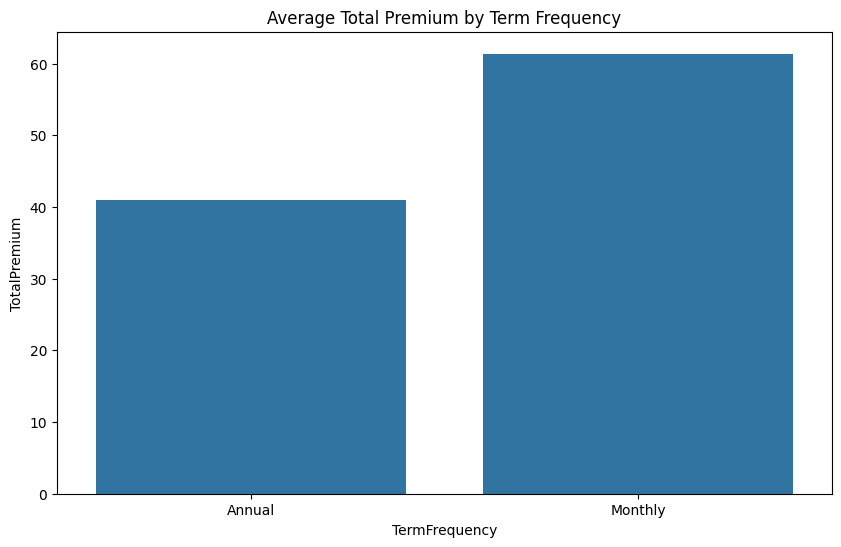

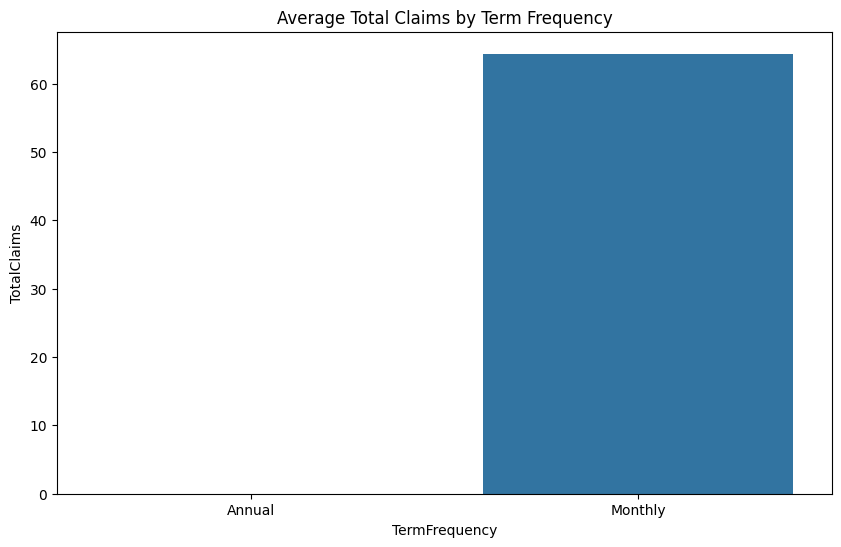

In [71]:
# Group by TermFrequency and calculate mean for TotalClaims and TotalPremium
term_frequency_group = df.groupby('TermFrequency')[['TotalClaims', 'TotalPremium']].mean().reset_index()

# Bar plot for TermFrequency vs TotalPremium
plt.figure(figsize=(10, 6))
sns.barplot(x='TermFrequency', y='TotalPremium', data=term_frequency_group)
plt.title('Average Total Premium by Term Frequency')
plt.show()

# Bar plot for TermFrequency vs TotalClaims
plt.figure(figsize=(10, 6))
sns.barplot(x='TermFrequency', y='TotalClaims', data=term_frequency_group)
plt.title('Average Total Claims by Term Frequency')
plt.show()


C:\Users\zelalem.wubet\AppData\Local\Temp\ipykernel_29008\644711716.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  excess_group = df.groupby('ExcessSelected')[['TotalClaims', 'TotalPremium']].mean().reset_index()
C:\Users\zelalem.wubet\AppData\Local\Temp\ipykernel_29008\644711716.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ExcessSelected', y='TotalPremium', data=excess_group, palette='coolwarm')


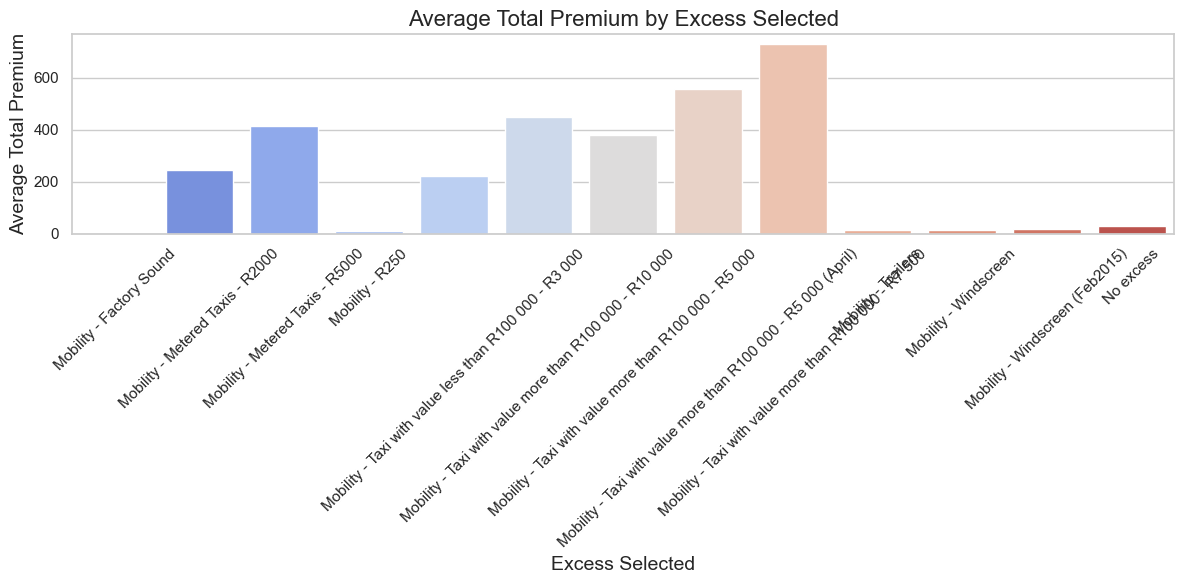

C:\Users\zelalem.wubet\AppData\Local\Temp\ipykernel_29008\644711716.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ExcessSelected', y='TotalClaims', data=excess_group, palette='coolwarm')


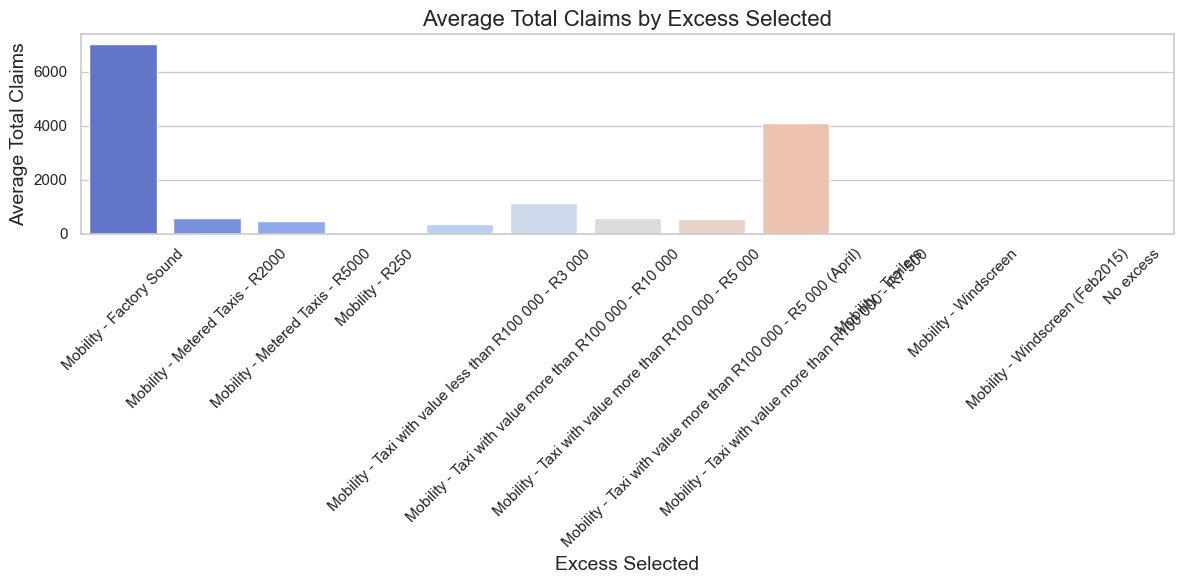

In [84]:
# Group by ExcessSelected and calculate mean for TotalClaims and TotalPremium
excess_group = df.groupby('ExcessSelected')[['TotalClaims', 'TotalPremium']].mean().reset_index()

# Set the style of seaborn
sns.set(style="whitegrid")

# Bar plot for ExcessSelected vs TotalPremium
plt.figure(figsize=(12, 6))
sns.barplot(x='ExcessSelected', y='TotalPremium', data=excess_group, palette='coolwarm')
plt.title('Average Total Premium by Excess Selected', fontsize=16)
plt.xlabel('Excess Selected', fontsize=14)
plt.ylabel('Average Total Premium', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar plot for ExcessSelected vs TotalClaims
plt.figure(figsize=(12, 6))
sns.barplot(x='ExcessSelected', y='TotalClaims', data=excess_group, palette='coolwarm')
plt.title('Average Total Claims by Excess Selected', fontsize=16)
plt.xlabel('Excess Selected', fontsize=14)
plt.ylabel('Average Total Claims', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\zelalem.wubet\AppData\Local\Temp\ipykernel_29008\3329557886.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cover_category_group = df.groupby('CoverCategory')[['TotalClaims', 'TotalPremium']].mean().reset_index()
C:\Users\zelalem.wubet\AppData\Local\Temp\ipykernel_29008\3329557886.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CoverCategory', y='TotalPremium', data=cover_category_group, palette='viridis')


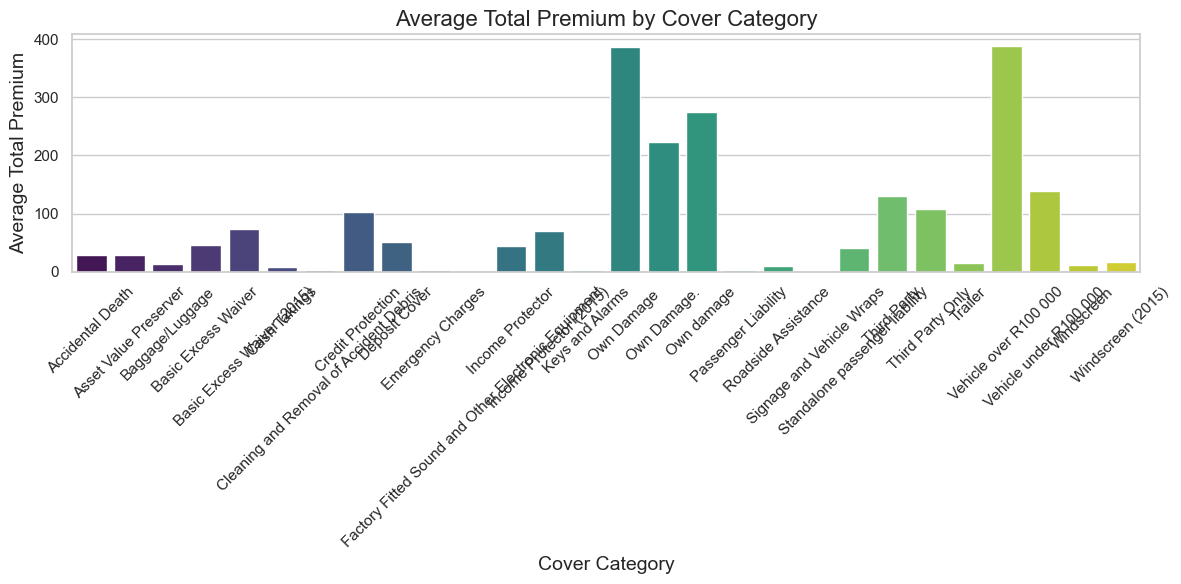

C:\Users\zelalem.wubet\AppData\Local\Temp\ipykernel_29008\3329557886.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CoverCategory', y='TotalClaims', data=cover_category_group, palette='viridis')


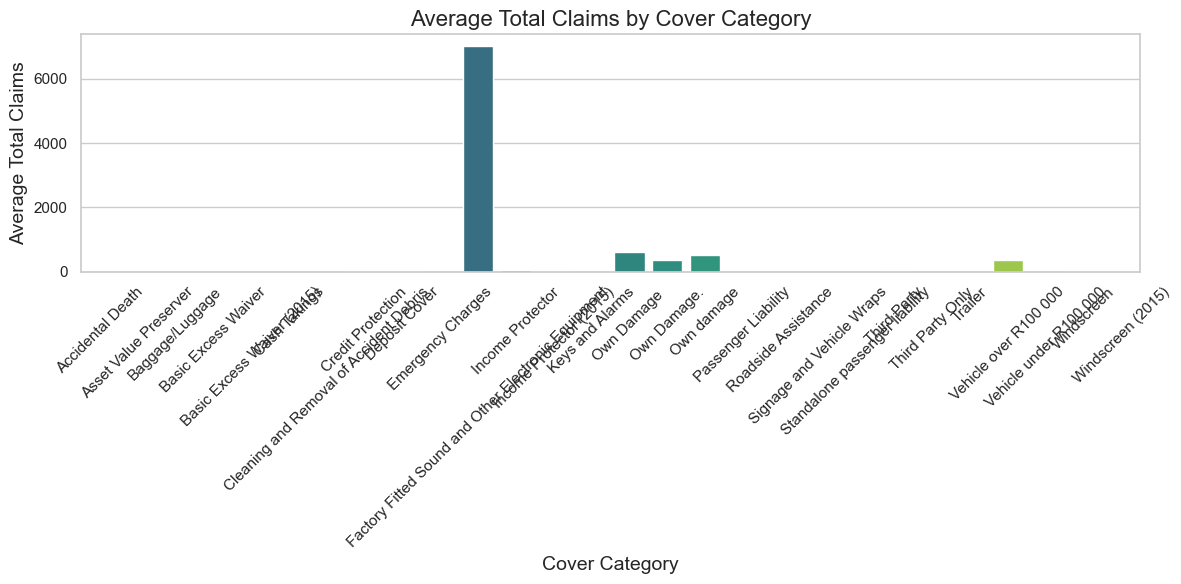

C:\Users\zelalem.wubet\AppData\Local\Temp\ipykernel_29008\3329557886.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cover_group_group = df.groupby('CoverGroup')[['TotalClaims', 'TotalPremium']].mean().reset_index()
C:\Users\zelalem.wubet\AppData\Local\Temp\ipykernel_29008\3329557886.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CoverGroup', y='TotalPremium', data=cover_group_group, palette='magma')


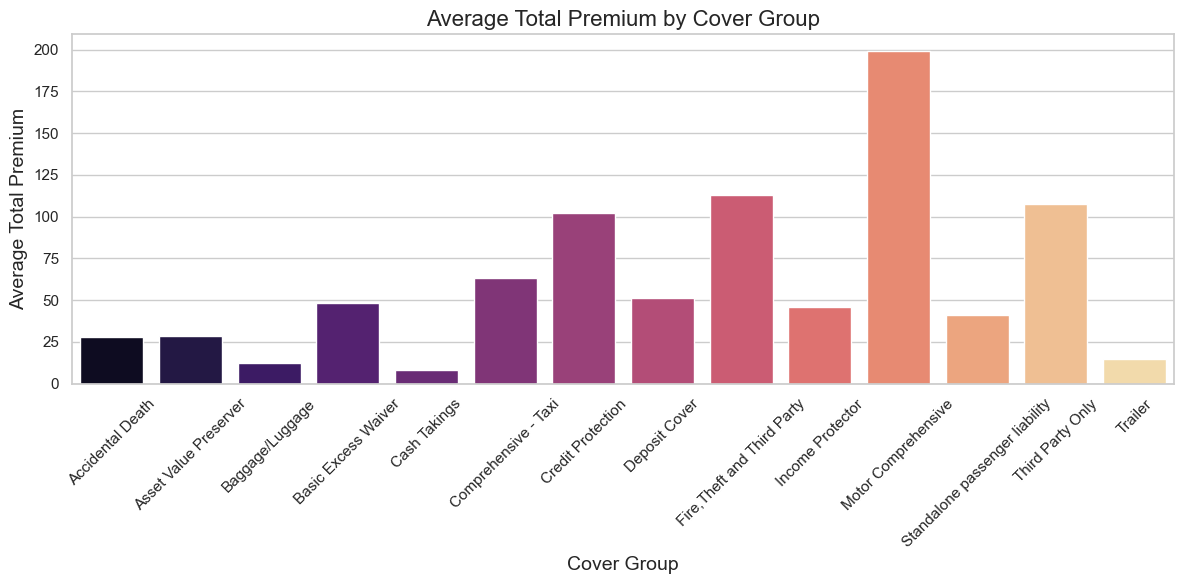

C:\Users\zelalem.wubet\AppData\Local\Temp\ipykernel_29008\3329557886.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CoverGroup', y='TotalClaims', data=cover_group_group, palette='magma')


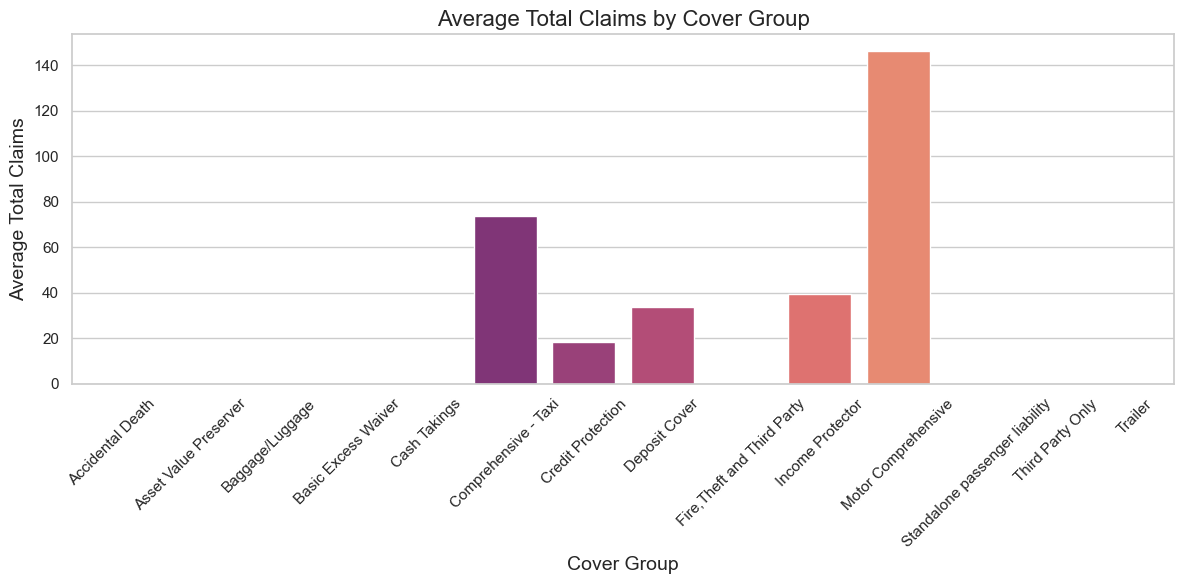

In [73]:
# Group by CoverCategory and calculate mean for TotalClaims and TotalPremium
cover_category_group = df.groupby('CoverCategory')[['TotalClaims', 'TotalPremium']].mean().reset_index()

# Set the style of seaborn
sns.set(style="whitegrid")

# Bar plot for CoverCategory vs TotalPremium
plt.figure(figsize=(12, 6))
sns.barplot(x='CoverCategory', y='TotalPremium', data=cover_category_group, palette='viridis')
plt.title('Average Total Premium by Cover Category', fontsize=16)
plt.xlabel('Cover Category', fontsize=14)
plt.ylabel('Average Total Premium', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar plot for CoverCategory vs TotalClaims
plt.figure(figsize=(12, 6))
sns.barplot(x='CoverCategory', y='TotalClaims', data=cover_category_group, palette='viridis')
plt.title('Average Total Claims by Cover Category', fontsize=16)
plt.xlabel('Cover Category', fontsize=14)
plt.ylabel('Average Total Claims', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Group by CoverGroup and calculate mean for TotalClaims and TotalPremium
cover_group_group = df.groupby('CoverGroup')[['TotalClaims', 'TotalPremium']].mean().reset_index()

# Bar plot for CoverGroup vs TotalPremium
plt.figure(figsize=(12, 6))
sns.barplot(x='CoverGroup', y='TotalPremium', data=cover_group_group, palette='magma')
plt.title('Average Total Premium by Cover Group', fontsize=16)
plt.xlabel('Cover Group', fontsize=14)
plt.ylabel('Average Total Premium', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar plot for CoverGroup vs TotalClaims
plt.figure(figsize=(12, 6))
sns.barplot(x='CoverGroup', y='TotalClaims', data=cover_group_group, palette='magma')
plt.title('Average Total Claims by Cover Group', fontsize=16)
plt.xlabel('Cover Group', fontsize=14)
plt.ylabel('Average Total Claims', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Explore Correlations Between Numerical Plan-Related Columns and TotalClaims/TotalPremium

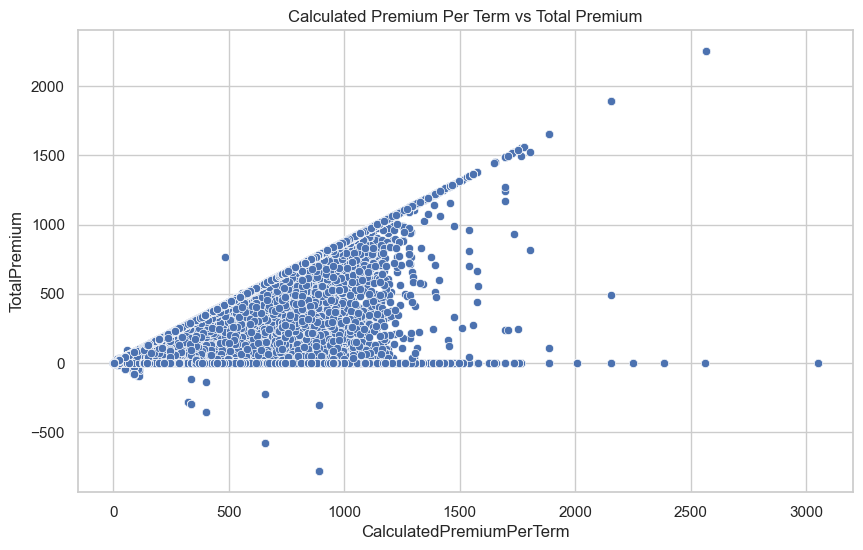

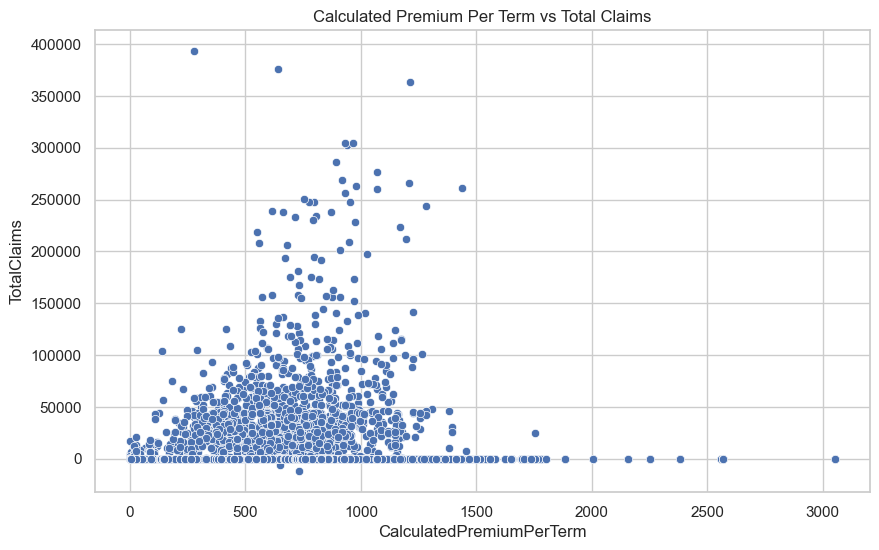

In [74]:
# Scatter plot for CalculatedPremiumPerTerm vs TotalPremium
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CalculatedPremiumPerTerm', y='TotalPremium', data=df)
plt.title('Calculated Premium Per Term vs Total Premium')
plt.show()

# Scatter plot for CalculatedPremiumPerTerm vs TotalClaims
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CalculatedPremiumPerTerm', y='TotalClaims', data=df)
plt.title('Calculated Premium Per Term vs Total Claims')
plt.show()


### Loss Ratio

The loss ratio is a key metric for insurance companies, as it shows the percentage of premiums that are paid out as claims. It helps assess the profitability and risk of the insurance business.
- A low loss ratio (below 100%) indicates that the company is collecting more in premiums than it is paying out in claims, which is generally profitable.
- A high loss ratio (above 100%) means that the company is paying out more in claims than it is receiving in premiums, indicating potential losses or an underpricing of premiums relative to risk.

In [75]:
# Calculate the overall Loss Ratio
loss_ratio = (df['TotalClaims'].sum() / df['TotalPremium'].sum()) * 100
print(f'Overall Loss Ratio: {loss_ratio:.2f}%')


Overall Loss Ratio: 104.84%


### Grouped Loss Ratio

###  Calculate Loss Ratio by CoverType

In [76]:
# Calculate Loss Ratio by CoverType
df['LossRatio'] = (df['TotalClaims'] / df['TotalPremium']) * 100
loss_ratio_by_cover = df.groupby('CoverType')['LossRatio'].mean().reset_index()

# Display the result
print(loss_ratio_by_cover)


                                            CoverType  LossRatio
0                                    Accidental Death   0.000000
1                               Asset Value Preserver   0.000000
2                                     Baggage/Luggage   0.000000
3                                 Basic Excess Waiver   0.000000
4                                        Cash Takings   0.000000
5             Cleaning and Removal of Accident Debris   0.000000
6                                   Credit Protection  31.419821
7                                       Deposit Cover  60.150376
8                                   Emergency Charges       -inf
9   Factory Fitted Sound and Other Electronic Equi...        inf
10                                     Fire and Theft   0.000000
11                                   Income Protector        inf
12                                    Keys and Alarms       -inf
13                                         Own Damage        inf
14                       

C:\Users\zelalem.wubet\AppData\Local\Temp\ipykernel_29008\2102479626.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loss_ratio_by_cover = df.groupby('CoverType')['LossRatio'].mean().reset_index()


C:\Users\zelalem.wubet\AppData\Local\Temp\ipykernel_29008\312124629.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='CoverType', y='LossRatio', data=loss_ratio_by_cover, palette='viridis')


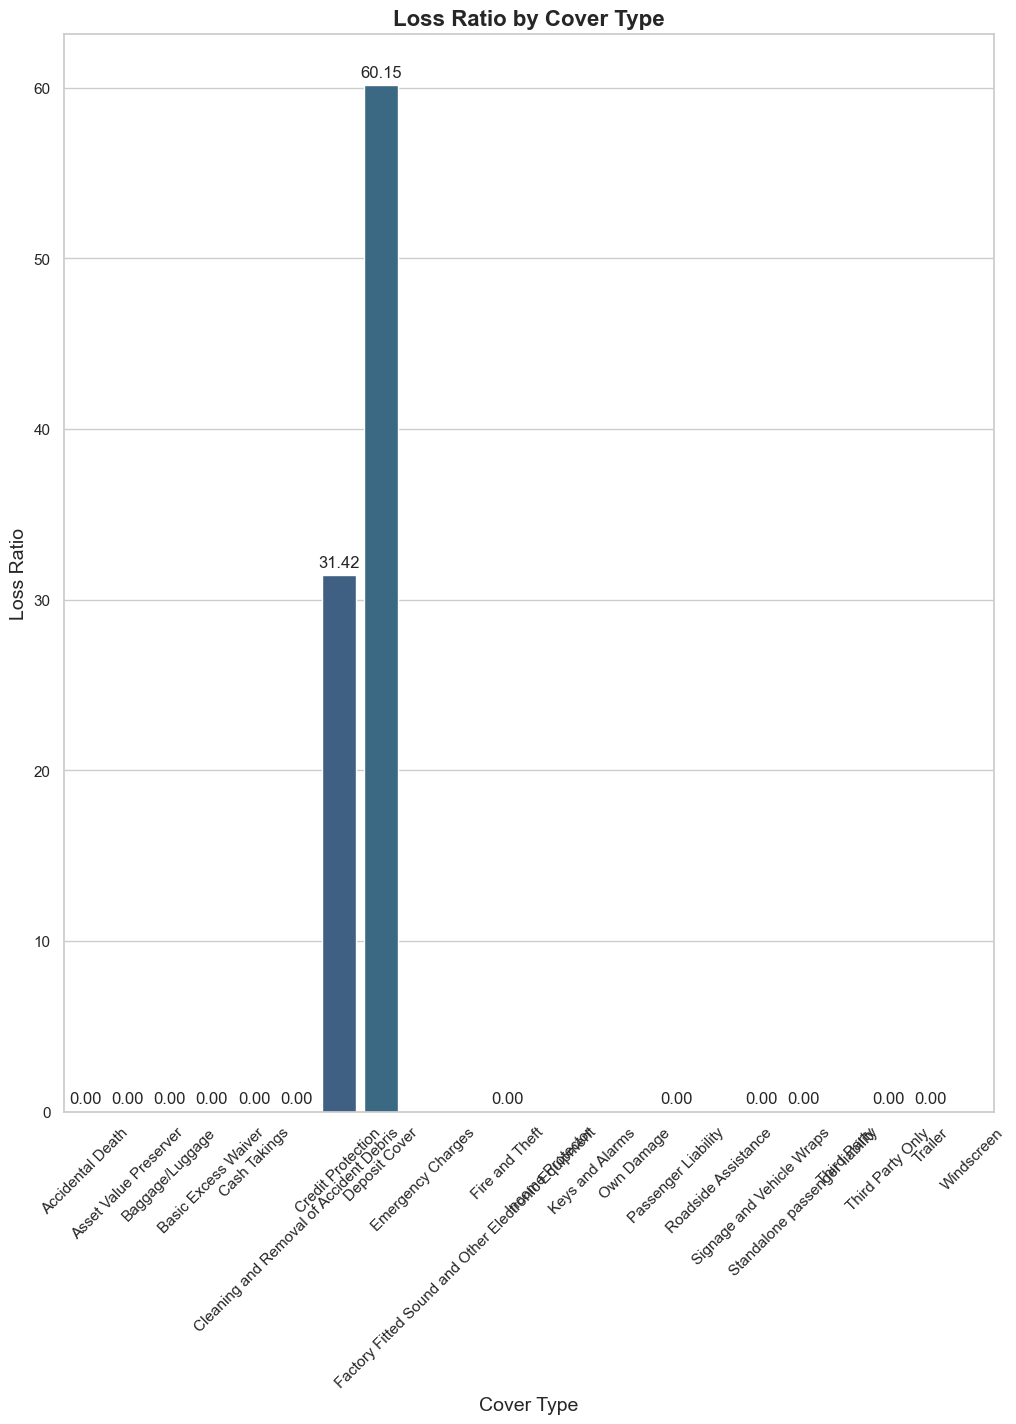

In [77]:

sns.set_style("whitegrid")

# Create a figure and axis
plt.figure(figsize=(12, 14))

# Create the bar plot
bar_plot = sns.barplot(x='CoverType', y='LossRatio', data=loss_ratio_by_cover, palette='viridis')

# Add a title and labels
plt.title('Loss Ratio by Cover Type', fontsize=16, fontweight='bold')
plt.xlabel('Cover Type', fontsize=14)
plt.ylabel('Loss Ratio', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add value labels on top of the bars
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')

# Show the plot
plt.show()

### Grouping loss ratio by Vehicle Type

In [78]:
#Grouping loss ratio by Vehicle Type
loss_ratio_by_vehicle_type = df.groupby('VehicleType').apply(
    lambda x: (x['TotalClaims'].sum() / x['TotalPremium'].sum()) * 100
).reset_index(name='LossRatio')

# Grouping loss ratio by Sum Insured
loss_ratio_by_sum_insured = df.groupby('SumInsured').apply(
    lambda x: (x['TotalClaims'].sum() / x['TotalPremium'].sum()) * 100
).reset_index(name='LossRatio')

# Display the results
print(loss_ratio_by_vehicle_type)
print(loss_ratio_by_sum_insured)


C:\Users\zelalem.wubet\AppData\Local\Temp\ipykernel_29008\2430943672.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loss_ratio_by_vehicle_type = df.groupby('VehicleType').apply(
C:\Users\zelalem.wubet\AppData\Local\Temp\ipykernel_29008\2430943672.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  loss_ratio_by_vehicle_type = df.groupby('VehicleType').apply(
C:\Users\zelalem.wubet\AppData\Local\Temp\ipykernel_29008\2430943672.py:8: RuntimeWarning: invalid value encountered in scalar divide
  lambda x: (

         VehicleType   LossRatio
0                Bus   13.729197
1   Heavy Commercial  162.811164
2   Light Commercial   23.206555
3  Medium Commercial  105.025086
4  Passenger Vehicle  104.819837
       SumInsured  LossRatio
0            0.01  97.038651
1         1000.00   0.000000
2         1500.00   0.000000
3         3500.00   0.000000
4         5000.00  13.277523
...           ...        ...
2177    689608.00   0.000000
2178    715712.00   0.000000
2179   1500000.00   0.000000
2180   5000000.00   0.000000
2181  10000000.00   0.000000

[2182 rows x 2 columns]


C:\Users\zelalem.wubet\AppData\Local\Temp\ipykernel_29008\2430943672.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  loss_ratio_by_sum_insured = df.groupby('SumInsured').apply(


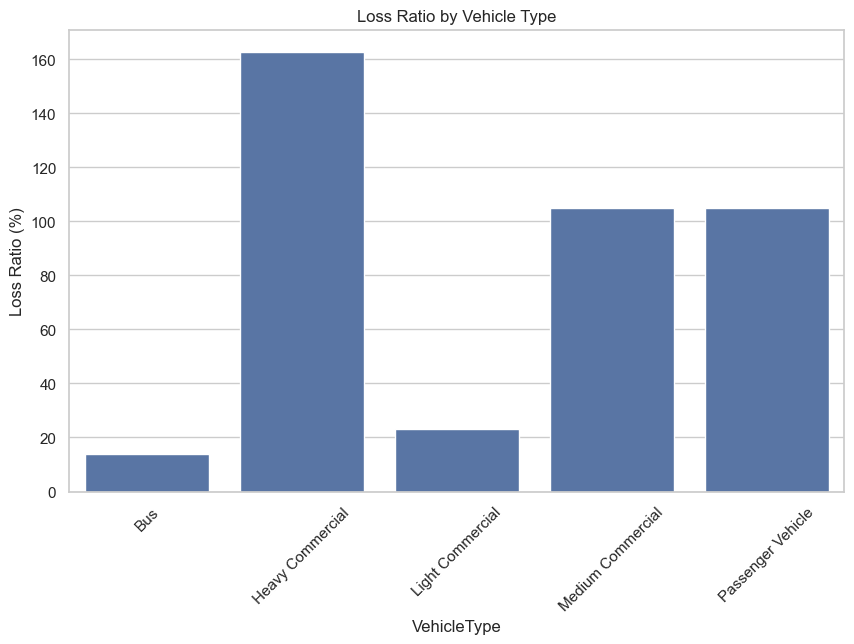

In [79]:
plt.figure(figsize=(10, 6))
sns.barplot(x='VehicleType', y='LossRatio', data=loss_ratio_by_vehicle_type)
plt.title('Loss Ratio by Vehicle Type')
plt.ylabel('Loss Ratio (%)')
plt.xticks(rotation=45)
plt.show()


#### Loss Ratio by Geographic Region

In [80]:
loss_ratio_by_province = df.groupby('Province').apply(lambda x: (x['TotalClaims'].sum() / x['TotalPremium'].sum()) * 100)

C:\Users\zelalem.wubet\AppData\Local\Temp\ipykernel_29008\3696401893.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loss_ratio_by_province = df.groupby('Province').apply(lambda x: (x['TotalClaims'].sum() / x['TotalPremium'].sum()) * 100)
C:\Users\zelalem.wubet\AppData\Local\Temp\ipykernel_29008\3696401893.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  loss_ratio_by_province = df.groupby('Province').apply(lambda x: (x['TotalClaims'].sum() / x['TotalPremium'].sum()) * 100)


C:\Users\zelalem.wubet\AppData\Local\Temp\ipykernel_29008\484141524.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loss_ratio_by_province = df.groupby('Province').apply(lambda x: (x['TotalClaims'].sum() / x['TotalPremium'].sum()) * 100)
C:\Users\zelalem.wubet\AppData\Local\Temp\ipykernel_29008\484141524.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  loss_ratio_by_province = df.groupby('Province').apply(lambda x: (x['TotalClaims'].sum() / x['TotalPremium'].sum()) * 100)


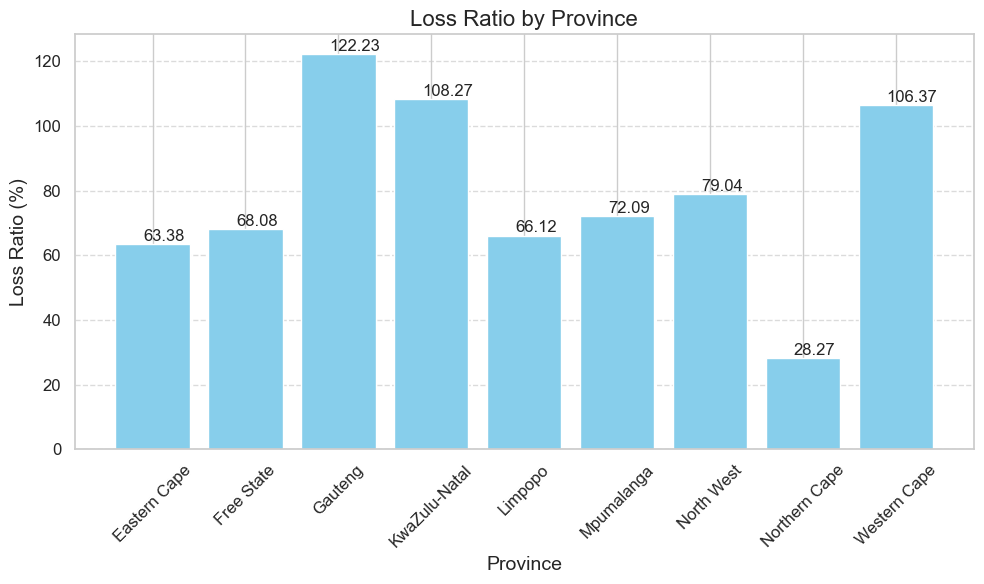

In [81]:
# Calculate loss ratio by province
loss_ratio_by_province = df.groupby('Province').apply(lambda x: (x['TotalClaims'].sum() / x['TotalPremium'].sum()) * 100)

# Plot the graph
plt.figure(figsize=(10, 6))
bars = plt.bar(loss_ratio_by_province.index, loss_ratio_by_province, color='skyblue')
plt.title('Loss Ratio by Province', fontsize=16)
plt.xlabel('Province', fontsize=14)
plt.ylabel('Loss Ratio (%)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add text annotations on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, yval + 1, round(yval, 2), fontsize=12)

plt.tight_layout()

# Show the plot
plt.show()

### Claims Frequency

Claims Frequency measures how often claims occur. It’s typically expressed as the number of claims per policy or per vehicle.
- High claims frequency indicates a higher likelihood of claims occurring, which could impact profitability.

In [82]:
df['ClaimsFrequency'] = (df['TotalClaims'] / df['PolicyID'].nunique()) * 100


### Claims Severity

Claims Severity measures the average cost per claim.
- Tracking claims severity helps insurers understand the magnitude of the risk they are covering.

In [83]:
df['ClaimsSeverity'] = df['TotalClaims'] / df['PolicyID']
